---
# **포스트 코로나 시대의 안전한 귀향을 위한 안내서**
---

## **들어가며**

바이러스의 감염으로 시작된 코로나19 상황은 우리의 일상을 송두리째 바꾸었습니다. 단순한 질병의 문제를 넘어 사회, 경제 분야까지 흔들고 있습니다. 

대한민국 역시도 첫 코로나19 확진자가 나왔고 이도 벌써 반년이 넘었습니다. 고강도 사회적 거리두기에 힘입어 한동안 확진자 수는 나아지는 양상을 보였으나, 최근 전국적으로 크고 작은 집단감염이 발발하며 다시 급격하게 증가하는 추세를 보이고 있습니다. <br>
[관련 기사(2020.08.31)](http://tbs.seoul.kr/news/newsView.do?typ_800=6&idx_800=3402708&seq_800=20395285)

<br>

####  질본 "대중교통 노출력 판단 어려워... 위생관리 강화해야"
![img5](https://image.newsis.com/2020/03/09/NISI20200309_0016160406_web.jpg?rnd=20200309143009) <br>
[기사 원문](https://newsis.com/view/?id=NISX20200311_0000951843&cID=10201&pID=10200)


첨부한 기사는 방역당국이 대중교통에서 바이러스의 노출력 판단은 사실상 불가능하다는 점을 인정하고, 대중교통이 자체적으로 위생 관리 수준을 향상시켜야 한다고 강조했다는 내용을 담고 있습니다. 이처럼 우리가 매일 불특정 다수와 밀집해서 이용하는 대중교통이 공공보건에 미칠 수 있는 위험은 쉽게 무시할 수 없습니다.

그렇다면 일상보다 훨씬 큰 범위를 이동해야 할 때, 우리는 어떻게 이동해야 할까요?

저희의 분석은 '포스트 코로나 시대의 귀향은 어떤 모습이여야 하는가'에 대한 질문에서 시작합니다. 국토교통 데이터 등을 통해 국민의 안전한 이동을 위한 새로운 아이디어를 제시하는 방향으로 분석을 진행하고자 합니다.


## **목차**

#### **[서론]**

**1. 선정배경**

**2. 문제 인식**

**3. 분석 목표**

#### **[본론]**

**1. 데이터 전처리**

**2. 코로나 전 & 후 통행량 추이 비교**
  - 2.1. 2019 vs 2020 : 일별 통행량 추이 비교

  - 2.2. 2019 vs 2020 : 통행 수단 별 통행량 비교

  - 2.3. 2019 vs 2020 : 요일별 통행량 비교
  
  - 2.4. 2019 vs 2020 : 도착지의 철도/버스통행량 비교


**3. 통행 수단 이용 현황 파악**

  - 3.1. 2019 vs 2020 : 서울 출발지 -> 도착지 비율 비교

  - 3.2. 기차(철도) 이용 현황

  - 3.3. 버스 이용 현황

**4. 안전한 귀향을 위한 안내서**

  - 4.1. 안내서 제작 프로세스

  - 4.2. 안전한 귀향을 위한 안내서


#### **[결론]**
**1. 기대효과**
- 1.1 이용자 맞춤 정보 제공

- 1.2 서비스의 확장성

- 1.3 코로나19 감염의 경각심을 일깨우는 알리미 역할
  
**2. 활용 방안**
    
**3. 한계점 및 개선방향**

## **사용 데이터 목록**

**[DACON 제공 데이터]**
- DS4C 코로나19 확진자 데이터 
  - Time.csv
  - PatientInfo.csv
  - Case.csv

- [한국교통안전공단] 교통카드 빅데이터 대중교통 이용정보
    - 발권 OD.dat
    - 지역코드.dat

<br>

**[외부 데이터 및 자료]**
- 서울시 행정구역 시군구 정보 (좌표계: WGS1984)
    - 출처: 서울열린데이터광장(https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do) 
- skorea_municipalities_geo_simple.json
    - 출처 : github/PinkWink(https://github.com/PinkWink/DataScience/tree/master/data)

<br>

**[자체 제작 데이터]**
- 인접플랫폼.csv
- 도착터미널구분.csv
- 서울시_주요_기차역+터미널_좌표.csv

---
# **서론**

## **1. 선정배경**

본격적인 분석에 앞서, 최근(2020.02~06) 코로나19 동향에 관한 시각화를 진행했습니다.

### 1.0. Module Import

In [66]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import folium
from folium import plugins
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Image
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import json
import time
warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline
plt.style.use('seaborn')

In [67]:
# 데이콘 plotly 업로드를 위한 코드
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [68]:
#그래프 한글 출력을 위한 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install git+https://github.com/python-visualization/branca.git@master

In [69]:
pd.set_option('max_columns', 24,'max_rows', 20) 
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)

### 1.1. 일자별 신규 & 누적 확진자수 (전국) 

#### 1.1.1. make_daily : 일별 확진자수를 기존 데이터에 추가하는  함수 정의

In [70]:
def make_daily(df):
    daily = df.sort_values(['date'], ascending = False)
    daily = daily.reset_index()
    daily = daily.drop(['index'],axis=1)
    
    only_case = []

    for i in range(len(daily)-1):
        only_case.append(daily['confirmed'][i]-daily['confirmed'][i+1])
    only_case.append(1)

    daily['daily'] = only_case

    daily = daily.sort_values(['date'],ascending=True)
    daily = daily.reset_index()
    daily = daily.drop(['index'],axis=1)
    
    return daily

In [71]:
# time data - date:날짜, confirmed:누적 확진자수 
time = pd.read_csv('Time.csv', usecols= ['date', 'confirmed']) 
time = make_daily(time)

In [72]:
fig = go.Figure()
fig.add_trace(go.Line(x=time['date'], y = time['confirmed'], name = "일자별 누적 확진자 수(전국)", marker_color='#009770', yaxis="y"))
fig.add_trace(go.Bar(x=time['date'], y = time['daily'], name = "일자별 확진자 수(전국)", marker_color='#E91E63', yaxis="y2"))
fig.update_layout(shapes=[dict(fillcolor="rgba(211, 211, 211, 0.3)",line={"width": 0}, type="rect",x0="2020-02-25",x1="2020-03-09",xref="x",y0=0,y1=0.95,yref="paper")])
fig.update_layout(xaxis=dict(rangeslider=dict(autorange=True, range=["2020-01-20", "2020-06-30"],visible=True),type="date"),
                  yaxis=dict(anchor="x",autorange=True,domain=[0, 0.5],linecolor="#009770",mirror=True,range=[-60.0858369099, 28.4406294707],showline=True,side="right",
                             tickfont={"color": "#009770"},tickmode="auto",ticks="",titlefont={"color": "#009770"},type="linear",zeroline=False),
                  yaxis2=dict(anchor="x",autorange=True,domain=[0.5, 0.95],linecolor="#E91E63",mirror=True,range=[29.3787777032, 100.621222297],showline=True,side="right",
                             tickfont={"color": "#E91E63"},tickmode="auto",ticks="",titlefont={"color": "#E91E63"},type="linear",zeroline=False))
fig.update_layout(dragmode="zoom", hovermode="x", height=700, template="plotly_dark", title_text = "일자별 코로나 확진 현황", margin=dict(t=100, b=100))
fig.show()

**※ 하단 슬라이드 바를 조절하면 원하는 기간을 집중적으로 보실 수 있습니다.**

신천지 집단감염 사태가 일어난 2월 말~3월 초에 확진자 수가 급증하였습니다. 이후 확진자 수는 한동안 잦아드는 추세를 보였으나 이태원 집단감염 사태가 일어난 5월 말을 기점으로 다시 증가하고 있는 것 또한 한 눈에 쉽게 확인할 수 있었습니다.

### 1.2. 일자별 신규 & 누적 확진자수

1.2.에서는 코로나19 확진자를 구체적인 지역과 함께 살펴봅니다.

#### 1.2.1. 코로나19 확진자 map

In [73]:
case = pd.read_csv('Case.csv')
pv_sum = case.filter(['province', 'confirmed']).groupby(['province']).sum()

In [74]:
pv_sum['lat'] = 0.0
pv_sum['lon'] = 0.0

#지역별 위도,경도 추가
pv_sum.loc['강원도','lat'] = 38.079
pv_sum.loc['강원도','lon'] = 128.284
pv_sum.loc['경기도','lat'] = 37.194
pv_sum.loc['경기도','lon'] = 127.255
pv_sum.loc['경상남도','lat'] = 35.295
pv_sum.loc['경상남도','lon'] = 128.389
pv_sum.loc['경상북도','lat'] = 36.652
pv_sum.loc['경상북도','lon'] = 128.828
pv_sum.loc['광주','lat'] = 35.128
pv_sum.loc['광주','lon'] = 126.850
pv_sum.loc['대구','lat'] = 35.826
pv_sum.loc['대구','lon'] = 128.527
pv_sum.loc['대전','lat'] = 36.263
pv_sum.loc['대전','lon'] = 127.404
pv_sum.loc['부산','lat'] = 35.160
pv_sum.loc['부산','lon'] = 129.113
pv_sum.loc['서울','lat'] = 37.590
pv_sum.loc['서울','lon'] = 127.002
pv_sum.loc['세종','lat'] = 36.551
pv_sum.loc['세종','lon'] = 127.303
pv_sum.loc['울산','lat'] = 35.516
pv_sum.loc['울산','lon'] = 129.322
pv_sum.loc['인천','lat'] = 37.484
pv_sum.loc['인천','lon'] = 126.652
pv_sum.loc['제주도','lat'] = 33.507
pv_sum.loc['제주도','lon'] = 126.525
pv_sum.loc['전라남도','lat'] =  34.694
pv_sum.loc['전라남도','lon'] = 126.976
pv_sum.loc['전라북도','lat'] =  35.774
pv_sum.loc['전라북도','lon'] = 127.099
pv_sum.loc['충청남도','lat'] = 36.566
pv_sum.loc['충청남도','lon'] = 126.617
pv_sum.loc['충청북도','lat'] = 36.756
pv_sum.loc['충청북도','lon'] = 127.602

In [75]:
m = folium.Map([36.4, 128], zoom_start=7)

for index, row in pv_sum.iterrows():
    folium.Circle(
        location = (row['lat'],row['lon']), 
        fill_color='#ff3399',
        color = '#E91E63',
        radius = row['confirmed']*12,
        popup=int(row['confirmed'])
    ).add_to(m)
m

**※ 각 지역을 클릭하면 해당 지역의 확진자수를 확인할 수 있습니다.**


확진자 지도를 통해 특정 지역에 국한되지 않고, 전국적으로 확진자가 발생하고 있음을 확인할 수 있습니다.

#### 1.2.2. 지역별 확진자 수 분포 

2020년 5월 31일까지의 확진자 수 분포입니다.



In [76]:
pv_sum = case.filter(['province', 'confirmed']).groupby(['province']).sum().reset_index()
data = [go.Pie(labels=pv_sum['province'], values=pv_sum['confirmed'],hole=.3)]
fig = go.Figure(data=data)
fig.update_layout(
    title={'text': "지역별 확진자 수", 'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(template='plotly_dark')
fig.update_traces(textposition='inside')
pyo.iplot(fig)

**※ 마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.**

bar plot은 대구, 서울, 경상북도, 경기도 순으로 코로나19 확진자가 많음을 확인할 수 있습니다. <br>
 먼저, 대구지역은 신천지 집단 감염 사태로 인해 확진자가 폭증했는데 이 때 인접한 경상북도 지역의 확진자도 함께 증가하는 경향을 보입니다. <br>
 대구와 경북지역을 제외하면 서울과 수도권 지역의 확진자 수가 많습니다. 방금 확인했던 것처럼 서울의 이태원 집단감염이 인접지역인 경기도까지 전파된 것이라 볼 수 있습니다.

### 1.3. 성별/나이대별 확진자수

In [77]:
patientinfo = pd.read_csv('PatientInfo.csv')
patientinfo = patientinfo.dropna(subset = ['sex', 'age']) #결측치 제거
patientinfo.sort_values(by=['age'], axis=0,inplace=True)

In [78]:
fig = px.histogram(patientinfo, x="age", color="sex", color_discrete_sequence = ['blue', '#E91E63'], marginal = 'violin')
fig.update_layout(barmode='stack')
fig.update_layout(template = 'plotly_dark')
fig.show()

**※ 마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.**

위 데이터를 통해 나이대별 확진자 데이터에서 20대 확진자의 비율이 가장 높다는 점을 확인할 수 있었습니다. <br>
이는 20대가 10대보다 비교적 활동하는 반경이 넓고 30대보다 비교적 여유시간을 더 가지기 때문이라고 생각했습니다.

## **2. 문제 인식**

지금까지의 흐름을 통해 얻은 인사이트들은 다음과 같이 정리할 수 있습니다.

1. 코로나19 확진자 수의 진정세는 멈추었고, 오히려 최근들어 폭증하는 추세를 보인다.

1. 특정 지역에서의 집단감염이 발생하는 경우 인접한 지역으로 전파될 가능성이 높다.

1. 국민들은 일상적으로 대중교통을 이용하는 데에 불안감을 느끼고 있으며, 실제로 대중교통을 통한 전파 위험은 가늠하기 어려운 수준이다. 

1. 나아가 항상 높은 철도/시외버스/고속버스 이용량을 보여왔던 특수연휴기간(2020.05 초순)의 귀향에 대한 불안 또한 증가하고 있다.


## **3. 분석 목표**

이에 저희는 다가오는 추석을 맞아 **도시 간 이동**에 주목하여 <한국교통안전공단 교통카드 빅데이터 대중교통 이용정보>의 **발권 OD** 데이터를 중심으로 분석을 진행하고자 합니다.

---

# **본론**


## **1. 데이터 전처리**

### 1.1. new_발권OD 데이터 생성

발권 OD.dat의 지역 코드에 따른 지역 명을 지역코드.dat에서 불러와 병합하여 new_발권OD 데이터를 생성하였습니다.

따라서 이어지는 분석은 new_발권OD.csv 파일로 진행하였습니다.

In [79]:
bo = pd.read_csv("new_발권OD.csv")
bo.head()

,년도,년월,운행 일자,요일 구분,출발 시도 명,출발 시군구 명,출발 읍면동 명,도착 시도 명,도착 시군구 명,도착 읍면동 명,철도 통행 인원,시외버스 통행 인원,고속버스 통행 인원,출발 시도 코드,출발 시군구 코드,출발 지역 코드,도착 시도 코드,도착 시군구 코드,도착 지역 코드
0,2019,201901,20190101,3,서울특별시,용산구,동자동,서울특별시,동대문구,전농동,7,0,0,11,11170,1117010700,11,11230,1123010400
1,2019,201901,20190101,3,서울특별시,용산구,동자동,서울특별시,중랑구,상봉동,6,0,0,11,11170,1117010700,11,11260,1126010200
2,2019,201901,20190101,3,서울특별시,용산구,동자동,서울특별시,영등포구,영등포동,17,0,0,11,11170,1117010700,11,11560,1156010100
3,2019,201901,20190101,3,서울특별시,용산구,동자동,부산광역시,동구,초량동,6776,0,0,11,11170,1117010700,26,26170,2617010100
4,2019,201901,20190101,3,서울특별시,용산구,동자동,부산광역시,북구,화명동,21,0,0,11,11170,1117010700,26,26320,2632010200


### 1.2. 버스 통행 인원 변수 생성

'시외버스 통행 인원'과 '고속버스 통행 인원' 변수를 합쳐 '버스 통행 인원' 변수를 생성합니다.

In [80]:
bo["버스 통행 인원"] = bo["시외버스 통행 인원"] + bo["고속버스 통행 인원"]

### 1.3. '요일 구분' 변수 생성

In [81]:
def weekday(x):
    days = {1:"일", 2:"월", 3:"화", 4:"수", 5:"목", 6:"금", 7:"토"}
    return days[x]

bo['요일 구분'] = bo['요일 구분'].apply(lambda x: weekday(x))

### 1.4. bo_2019, bo_2020 데이터 생성

2019년과 2020년의 데이터를 따로 분리하여 각각 bo_2019, bo_2020 데이터에 담았습니다.
또한 첫 코로나 확진자 발생일이 1월 19일이므로, 비교를 위해 두 데이터 모두 1월 19일 이후의 데이터만 추출했습니다.

In [82]:
bo_2019 = bo[bo['년도'] == 2019]
bo_2019 = bo_2019[bo_2019["운행 일자"]>=20190119]
bo_2020 = bo[bo['년도'] == 2020]
bo_2020 = bo_2020[bo_2020["운행 일자"]>=20200119]

### 1.5. 운행일자 변수 처리

운행일자 변수를 dtype date로 처리합니다.

In [83]:
def to_datetime(x):
    date = dt.datetime.strptime(str(x), "%Y%m%d").date()
    return date

bo_2019['운행 일자'] = bo_2019['운행 일자'].apply(lambda x: to_datetime(x))
bo_2020['운행 일자'] = bo_2020['운행 일자'].apply(lambda x: to_datetime(x))

### 1.6. 출발지가 서울인 데이터 추출

In [84]:
##차후 시각화를 위해 출발지 서울인 데이터만 추출
bo_2019_1 = bo_2019.copy()
bo_2020_1 = bo_2020.copy()
bo_2019 = bo_2019[bo_2019['출발 시도 명'] == "서울특별시"]
bo_2020 = bo_2020[bo_2020['출발 시도 명'] == "서울특별시"]

### 1.7. 버스와 철도 데이터 분할

기차(철도)와 버스 각각 2019,2020년 데이터를 추출합니다.

In [85]:
#버스(시외버스+고속버스), 철도 데이터로 분할
bus_19 = bo_2019[["운행 일자", "요일 구분", "버스 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]
bus_19_1 = bo_2019_1[["운행 일자", "요일 구분", "버스 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]
bus_20 = bo_2020[["운행 일자", "요일 구분", "버스 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]
bus_20_1 = bo_2020_1[["운행 일자", "요일 구분", "버스 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]
train_19 = bo_2019[["운행 일자", "요일 구분", "철도 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]
train_19_1 = bo_2019_1[["운행 일자", "요일 구분", "철도 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]
train_20 = bo_2020[["운행 일자", "요일 구분", "철도 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]
train_20_1 = bo_2020_1[["운행 일자", "요일 구분", "철도 통행 인원", "출발 시군구 코드", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"]]

### 1.8. 최종 데이터

시각화를 위해 생성한 데이터는 총 6가지입니다.
- bo_2019(서울 출발), bo_2019_1(전국)
- bo_2020(서울 출발), bo_2020_1(전국)
- bus_19(서울 출발), bus_19(전국)
- bus_20(서울 출발), bus_20(전국)
- train_19(서울 출발), train_19(전국)
- train_20(서울 출발), train_20(전국)

## **2. 코로나 전 & 후 통행량 추이 비교**

### 2.1. 2019 vs 2020 : 일별 통행량 추이 비교

코로나 전후의 통행 수단 이용량을 2019년과 2020년의 일별 통행량 합계를 통해 비교합니다. 이번 통행량은 철도와 고속버스, 시외버스의 통행 인원을 합산하여 나타내었습니다. 

In [86]:
#2019년
bo_total_2019 = pd.DataFrame(bo_2019_1['철도 통행 인원'].groupby(bo_2019_1['운행 일자']).sum())
bo_total_2019["시외버스 통행 인원"] = bo_2019_1['시외버스 통행 인원'].groupby(bo_2019_1['운행 일자']).sum()
bo_total_2019["고속버스 통행 인원"] = bo_2019_1['고속버스 통행 인원'].groupby(bo_2019_1['운행 일자']).sum()
#2020년
bo_total_2020 = pd.DataFrame(bo_2020_1['철도 통행 인원'].groupby(bo_2020_1['운행 일자']).sum())
bo_total_2020["시외버스 통행 인원"] = bo_2020_1['시외버스 통행 인원'].groupby(bo_2020_1['운행 일자']).sum()
bo_total_2020["고속버스 통행 인원"] = bo_2020_1['고속버스 통행 인원'].groupby(bo_2020_1['운행 일자']).sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=bo_total_2019.index, y=bo_total_2019["철도 통행 인원"]+bo_total_2019["시외버스 통행 인원"]+bo_total_2019["고속버스 통행 인원"],hoverinfo='x+y',mode='lines',stackgroup='one',name='2019년', marker_color="#009770"))
fig.add_trace(go.Scatter(x=bo_total_2019.index, y=bo_total_2020["시외버스 통행 인원"]+bo_total_2020["시외버스 통행 인원"]+bo_total_2020["고속버스 통행 인원"],hoverinfo='x+y',mode='lines',stackgroup='two',name='2020년', marker_color="#E91E63"))
fig.update_layout(xaxis=dict(rangeslider=dict(autorange=True, range=["2020-01-19", "2020-05-31"],visible=True),type="date"))
fig.update_layout(template='plotly_dark', title_text="2019년 vs. 2020년 전국 총 통행량 합계 추이", height=700)
fig.show()

**※ 하단 슬라이드 바를 조절하시면 원하는 구간을 집중적으로 보실 수 있습니다.**

일정한 주기를 가지고 골고루 이용량이 분포되어있는 2019년에 비해, 2020년의 총 통행인원수는 자그마치 절반 가까이 줄었음을 확인할 수 있습니다.

위 그래프에서 찾을 수 있는 특이점 두가지가 있습니다.

1. 2월에서 특정 기간 폭등하는 이용량 <br>
  : 이는 설날 연휴 기간의 특수성 때문이라 할 수 있습니다. 2020년의 설 연휴 기간 역시 코로나19 확진자가 폭등하기 전이였기 때문에 이 기간의 이용량은 둘이 큰 차이를 보이지는 않습니다.   

2. 5월에서 특정 기간 폭등하는 이용량 <br>
  : 근로자의 날, 어린이날, 어버이날이 몰려 있는 5월 초순은 황금 연휴기간으로, 매년 이 시기에는 철도/버스 통행량이 급증했습니다. 하지만 2020년의 경우 코로나19의 영향으로 2019년의 절반 이하로 뚝 떨어진 것을 확인할 수 있습니다.

### 2.2. 2019 vs 2020 : 통행수단별 통행량 비교

철도, 시외버스, 고속버스 세 통행수단 별로 통행량 합계 추이 그래프를 나타냅니다.

In [87]:
# 2019년 
fig = go.Figure()
fig.add_trace(go.Scatter(x=bo_total_2019.index, y=bo_total_2019["철도 통행 인원"], hoverinfo='x+y',
                         mode='lines', stackgroup='one', name='철도', marker_color = "#009770"))
fig.add_trace(go.Scatter(x=bo_total_2019.index, y=bo_total_2019["시외버스 통행 인원"], hoverinfo='x+y',
                         mode='lines', stackgroup='one', name='시외버스', marker_color = "#E91E63"))
fig.add_trace(go.Scatter(x=bo_total_2019.index, y=bo_total_2019["고속버스 통행 인원"], hoverinfo='x+y',
                         mode='lines',stackgroup='one', name='고속버스', marker_color = "#FFDF65"))
fig.update_layout(template='plotly_dark',title_text="2019년 전국 통행수단 별 통행량 합계 추이", height=600)
fig.update_layout(xaxis=dict(rangeslider=dict(autorange=True, range=["2020-01-19", "2020-05-31"],visible=True),type="date"))
fig.show()

# 2020년
fig = go.Figure()
fig.add_trace(go.Scatter(x=bo_total_2020.index, y=bo_total_2020["철도 통행 인원"], hoverinfo='x+y',
                         mode='lines', stackgroup='one', name='철도', marker_color = "#009770"))
fig.add_trace(go.Scatter(x=bo_total_2020.index, y=bo_total_2020["시외버스 통행 인원"], hoverinfo='x+y',
                         mode='lines', stackgroup='one', marker_color = "#E91E63", name='시외버스'))
fig.add_trace(go.Scatter(x=bo_total_2020.index, y=bo_total_2020["고속버스 통행 인원"], hoverinfo='x+y',
                         mode='lines', stackgroup='one', name='고속버스', marker_color = "#FFDF65"))
fig.update_layout(template='plotly_dark',title_text="2020년 전국 통행수단 별 통행량 합계 추이", height=600)
fig.update_layout(xaxis=dict(rangeslider=dict(autorange=True, range=["2020-01-19", "2020-05-31"],visible=True),type="date"))
fig.show()

**※ 하단 슬라이드 바를 조절하시면 원하는 구간을 집중적으로 보실 수 있습니다.**

- 공통점 : 2019년과 2020년 모두 버스(시외버스 + 고속버스) 통행량이 철도 통행량보다 높게 나타납니다. 

- 차이점 : 코로나19 사태가 심각해진 2020년 2월 중순에 들어서부터 통행수단을 막론하고 통행량이 확연히 줄어드는 것을 확인할 수 있습니다. 

- 5월 연휴기간을 기점으로 통행량은 다시 오르는 추세를 보입니다.
 

### 2.3. 2019 vs 2020 : 요일별 통행량 비교

2019년과 2020년의 각 요일별 버스/철도 통행량 그래프를 비교합니다. 

In [88]:
# 요일별 평균 통행량 확인
day = ['월', '화', '수', '목', '금', '토', '일']
bus_amt_20 = bus_20_1.groupby(['요일 구분']).mean()['버스 통행 인원'].to_frame().loc[day, :]
bus_amt_19 =bus_19_1.groupby(['요일 구분']).mean()['버스 통행 인원'].to_frame().loc[day, :]
train_amt_20 =train_20_1.groupby(['요일 구분']).mean()['철도 통행 인원'].to_frame().loc[day, :]
train_amt_19 =train_19_1.groupby(['요일 구분']).mean()['철도 통행 인원'].to_frame().loc[day, :]

In [89]:
# 버스 전처리
bus_amt_19['연도'] = 2019
bus_amt_20['연도'] = 2020
bus_amt_19 = bus_amt_19.reset_index()
bus_amt_20 = bus_amt_20.reset_index()
bus_by_day = pd.concat([bus_amt_19, bus_amt_20])
bus_by_day.columns = ['day', 'bus', 'year']

# 기차(철도) 전처리
train_amt_19['연도'] = 2019
train_amt_20['연도'] = 2020
train_amt_19 = train_amt_19.reset_index()
train_amt_20 = train_amt_20.reset_index()
train_by_day = pd.concat([train_amt_19, train_amt_20])
train_by_day.columns = ['day', 'train', 'year']

In [90]:
# 버스
fig = px.funnel(bus_by_day, x='bus', y='day', color='year',color_discrete_sequence=["#009770", "#E91E63"])
fig.update_layout(title={'text':'2019 vs 2020 요일별 버스 통행량 평균', 'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(template='plotly_dark', font=dict(size=13), height=500)
fig.show()

# 기차(철도)
fig = px.funnel(train_by_day, x='train', y='day', color='year',color_discrete_sequence=["#009770", "#E91E63"])
fig.update_layout(title={'text':"2019 vs 2020 요일별 기차(철도) 통행량 평균", 'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(template='plotly_dark', font=dict(size=13), height=500)
fig.show()

**※ 마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.**

정도의 차이만 있을 뿐, 그래프에서 2019년과 2020년의 요일별 통행량 분포는 거의 유사하게 나타나는 것을 볼 수 있습니다. 

앞선 분석결과들을 통해 코로나19 사태  이후에 절대적인 통행량 수치가 감소한 것을 확인했습니다. 코로나19로 인한 비대면 수업과 재택 근무 등의 증가로 인해 2019년과 2020년의 평일/주말 통행량 분포가 차이를 보일 것이라 예상했습니다. 하지만 여전히 평일보다 주말의 통행량이 높은 모습을 볼 수 있습니다. 


### 2.4. 2019 vs 2020 : 도착지의 철도/버스통행량 비교
2019년과 2020년의 도착지 별 철도통행량 및 버스통행량을 비교합니다.

#### 2.4.1. 시도별 주요 도시 최종 세분화
비교에 앞서 시도별 주요 도시를 최종적으로 세분화하기 위한 기준을 잡아줍니다. 광역시를 제외한 시도 별 시군구 통행인원 top10을 출력하고, 이를 토대로 시도별 주요 도시 세분화 계획을 세웁니다.

In [91]:
## 광역시 제외 시도 목록 생성
sido = ["경기도", "강원도", "충청북도", "충청남도", "전라북도", "전라남도", "경상북도", "경상남도"]
#2020년 시도 별 시군구 통행인원 Top 10 출력 
for s in range(len(sido)):
    total = {}
    new = bo_2020_1.groupby('도착 시도 명').get_group(sido[s])
    city = list(new["도착 시군구 명"].unique())
    for c in city:
        new_1 = new.groupby("도착 시군구 명").get_group(c).sum()
        total[c] = new_1["철도 통행 인원"]+new_1["시외버스 통행 인원"]+new_1["고속버스 통행 인원"]
    result = sorted(total.items(), key = lambda x: x[1], reverse=True)[:10]
    print(sido[s], result)

경기도 [('수원시 팔달구', 1320678), ('평택시', 1128206), ('광명시', 1059323), ('성남시 분당구', 501474), ('수원시 권선구', 453359), ('화성시', 363522), ('안산시 상록구', 332264), ('이천시', 303785), ('안성시', 226899), ('용인시 처인구', 195564)]
강원도 [('원주시', 935732), ('춘천시', 811060), ('강릉시', 769120), ('속초시', 280292), ('동해시', 173735), ('홍천군', 126762), ('평창군', 123567), ('태백시', 78478), ('삼척시', 77608), ('정선군', 70506)]
충청북도 [('청주시 흥덕구', 1898835), ('충주시', 422111), ('제천시', 314171), ('청주시 청원구', 288473), ('진천군', 142375), ('영동군', 119535), ('음성군', 109277), ('증평군', 72040), ('청주시 서원구', 66810), ('옥천군', 53670)]
충청남도 [('천안시 동남구', 1589416), ('아산시', 1124856), ('서산시', 423040), ('당진시', 327985), ('공주시', 313418), ('논산시', 248982), ('예산군', 200431), ('홍성군', 198373), ('보령시', 181494), ('태안군', 135430)]
전라북도 [('전주시 덕진구', 1545315), ('익산시', 1007641), ('군산시', 437225), ('정읍시', 251346), ('남원시', 202190), ('임실군', 93562), ('고창군', 92772), ('전주시 완산구', 70356), ('부안군', 67661), ('김제시', 58893)]
전라남도 [('순천시', 688873), ('목포시', 580227), ('여수시', 549030), ('나주시', 172161), ('광양시',

위 결과값을 고려하여 시도별 통행량이 많은 순서대로 6개의 도시를 주요 도시로 선정하였습니다.

<br>

**[시도별 주요 도시 최종 세분화 계획]**

- 경기도: 수원시, 평택시, 광명시, 성남시, 화성시, 안산시
- 강원도: 원주시, 춘천시, 강릉시, 속초시, 동해시, 홍천군
- 충청북도: 청주시, 충주시, 제천시, 진천군, 영동군, 음성군
- 충청남도: 천안시, 아산시, 서산시, 당진시, 공주시, 논산시
- 전라북도: 전주시, 익산시, 군산시, 정읍시, 남원시, 임실군
- 전라남도: 순천시, 목포시, 여수시, 나주시, 광양시, 고흥군
- 경상북도: 경주시, 구미시, 포항시, 김천시, 경산시, 안동시
- 경상남도: 진주시, 창원시, 밀양시, 김해시, 통영시, 거제시

#### 2.4.2. 도착지의 철도/버스통행량 비교

In [92]:
#도착지가 결측치로 처리되어있는 경우 drop하여 새로운 데이터셋 생성
bo_2019_drop = bo_2019_1.copy()
bo_2020_drop = bo_2020_1.copy()
bo_2019_drop.dropna(subset=['도착 시도 명', '도착 시군구 명'], inplace=True)
bo_2020_drop.dropna(subset=['도착 시도 명', '도착 시군구 명'], inplace=True)

areas = ["부산광역시", "대구광역시", "광주광역시", "대전광역시", "울산광역시", "세종특별자치시", "인천광역시",
        "경기도", "충청북도", "충청남도", "전라북도", "전라남도", "경상북도", "경상남도", "강원도"]
sigungu = []
#광역시의 경우 시군구, 그외 시도들은 주요 도시로 2차원 배열 생성 
for s in range(7):
    area = bo_2020_drop.groupby('도착 시도 명').get_group(areas[s])
    sigungu.append(list(area["도착 시군구 명"].unique()))
sigungu.append(["수원시", "평택시", "광명시", "성남시", "화성시", "안산시"])
sigungu.append(["청주시", "충주시", "제천시", "진천군", "영동군", "음성군"])
sigungu.append(["천안시", "아산시", "서산시", "당진시", "공주시", "논산시"])
sigungu.append(["전주시", "익산시", "군산시", "정읍시", "남원시", "임실군"])
sigungu.append(["순천시", "목포시", "여수시", "나주시", "광양시", "고흥군"])
sigungu.append(["경주시", "구미시", "포항시", "김천시", "경산시", "안동시"])
sigungu.append(["진주시", "창원시", "밀양시", "김해시", "통영시", "거제시"])
sigungu.append(["원주시", "춘천시", "강릉시", "속초시", "동해시", "홍천군"])

#지역별 도착지의 철도/버스통행량 비교를 위한 시각화
for a in range(len(areas)):
    kk_19 = bo_2019_drop.groupby('도착 시도 명').get_group(areas[a])
    kk_20 = bo_2020_drop.groupby('도착 시도 명').get_group(areas[a])

    all_kk = pd.DataFrame(index=range(0,12), columns = ["년도", "도착 시군구 명", "철도 통행 인원", "시외버스 통행 인원", "고속버스 통행 인원"])
    nums = ["철도 통행 인원", "시외버스 통행 인원", "고속버스 통행 인원"]
    for i in range(len(sigungu[a])):
        all_kk["도착 시군구 명"][2*i] = sigungu[a][i] + "_2019"
        all_kk["년도"][2*i] = 2019
        all_kk["도착 시군구 명"][2*i+1] = sigungu[a][i] + "_2020"
        all_kk["년도"][2*i+1] = 2020
        kk_19_1 = kk_19[kk_19['도착 시군구 명'].str.contains(sigungu[a][i])]
        kk_20_1 = kk_20[kk_20['도착 시군구 명'].str.contains(sigungu[a][i])]
        for n in range(len(nums)):
            new_19 = kk_19_1[kk_19_1[nums[n]]!=0]
            avg_19 = new_19[nums[n]].sum()//len(new_19["운행 일자"].unique())
            new_20 = kk_20_1[kk_20_1[nums[n]]!=0]
            avg_20 = new_20[nums[n]].sum()//len(new_20["운행 일자"].unique())    
            all_kk[nums[n]][2*i] = avg_19
            all_kk[nums[n]][2*i+1] = avg_20

    trace1 = go.Bar(x=all_kk["도착 시군구 명"], y=all_kk["철도 통행 인원"], name='철도', marker_color = "#009770")
    trace2 = go.Bar(x=all_kk["도착 시군구 명"], y=all_kk["시외버스 통행 인원"], name='시외버스', marker_color = "#E91E63")
    trace3 = go.Bar(x=all_kk["도착 시군구 명"], y=all_kk["고속버스 통행 인원"], name='고속버스', marker_color = "#FFDF65")
    data = [trace1, trace2, trace3]
    title = areas[a]+" 일평균 통행 수단 별 통행 인원 분포"
    layout = go.Layout(template='plotly_dark',title=title, barmode='stack', height=500)
    fig = go.Figure(data=data, layout=layout)
    pyo.iplot(fig)

**※ 마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.**

주목할만한 점은 코로나로 인해 2020년의 전체 통행량 자체는 2019년에 비해 절반 가까이 줄었으나, 통행수단별 이용량의 비율은 둘이 비슷하게 나타났다는 것입니다. 이는 사람들이 도시간 이동을 할 때 본인에게 익숙한 통행수단을 이용하기 때문이라고 생각했습니다. 따라서 특정 통행수단에 사람이 몰리지 않도록 분산시켜야 할 필요성을 느꼈습니다.

## **3.통행 수단 이용 현황 파악**

철도, 고속 버스 등의 통행 수단 이용자를 효과적으로 분산시키는 방법을 찾기 위해 인구의 대부분이 밀집되어 있는 서울에 초점을 맞추어 분석을 진행하고자 합니다.

우선 서울을 출발지로 하는 도착지의 비율을 비교하고, 서울의 주요 기차역과 버스 터미널을 선정하여 효과적인 통행 수단 이용자의 분산을 위한 인사이트를 얻고자 합니다.

### 3.1. 2019 vs 2020 : 서울 출발지 -> 도착지 비율 비교


In [93]:
#도착 시도 별 고속버스, 시외버스, 철도, 총 통행인원 df 생성(19년도,20년도)
area =pd.pivot_table(bo_2019, index = "도착 시도 명", values = ["철도 통행 인원", "시외버스 통행 인원", "고속버스 통행 인원"], aggfunc = 'sum')
area20 = pd.pivot_table(bo_2020, index = "도착 시도 명", values = ["철도 통행 인원", "시외버스 통행 인원", "고속버스 통행 인원"], aggfunc = 'sum')
area["총 통행 인원"] = area["고속버스 통행 인원"]+area["시외버스 통행 인원"]+area["철도 통행 인원"]
area20["총 통행 인원"] = area20["고속버스 통행 인원"]+area20["시외버스 통행 인원"]+area20["철도 통행 인원"]

#도착지가 서울인 행 제거
area = area[area.index !="서울특별시"]
area20 = area20[area20.index!="서울특별시"]

#서울에서 가장 많이 향하는 행선지는?
fig = make_subplots(rows=1, cols=2, subplot_titles=("2019","2020"), 
                    specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(labels=area.index, values=area["총 통행 인원"]),row=1, col=1)
fig.add_trace(go.Pie(labels=area20.index, values=area20["총 통행 인원"]),row=1, col=2)

fig.update_layout(template='plotly_dark', title_text="2019, 2020년 서울발 도착지 비율")
fig.show()


**※ 마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.**

2019년과 2020년의 도착지 모두 경기도, 강원도, 충청남도, 대전광역시, 충청북도가 강세를 보이고 있습니다. 

반대로, 서울과 거의 맞닿아 있는 인천지역의 경우는 2020년 기준 약 0.4% 비율만 차지하는 것을 볼 수 있습니다. 

### 3.2. 기차(철도) 이용 현황

통행 수단 중 기차(철도) 이용 현황을 살펴봅니다. 

#### 3.2.1. 주요 기차역 선정

출발지역 코드별로 통행량의 평균을 비교하여 주요 기차역을 선정합니다.

In [94]:
# 2019 + 2020
train = pd.concat([train_19, train_20], ignore_index=True)

# 0인 행 제거
idx_nm_1 = train[train['철도 통행 인원'] == 0].index
train = train.drop(idx_nm_1)

# 운행 일자 별 각 출발 지역 코드의 철도/버스 통행 인원 (그 터미널/역의 하루 동안 통행한 인원 합계)
train_pivot = train.pivot_table(index = ["운행 일자", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"], 
                 aggfunc = "sum", 
                 values = "철도 통행 인원")

# 접근하기 쉽도록 reset_index
train_daily = train_pivot.reset_index()
train_daily_pivot = train_daily.pivot_table(index = ["출발 지역 코드", "출발 시도 명", "출발 시군구 명"], 
                 aggfunc = "mean", 
                 values = "철도 통행 인원")

In [95]:
# Top 5 
train_rank = train_daily_pivot.sort_values(by='철도 통행 인원', ascending=False)
train_rank.head()

,,,철도 통행 인원
출발 지역 코드,출발 시도 명,출발 시군구 명,
1117010700,서울특별시,용산구,37164.775281
1117012800,서울특별시,용산구,18638.479401
1168011500,서울특별시,강남구,16825.363296
1156010100,서울특별시,영등포구,9765.176030
1123010400,서울특별시,동대문구,7282.876404


표에서의 출발 지역 코드, 출발 시도 명, 출발 시군구 명을 매칭하면 다음과 같이 Top5 기차역을 선정할 수 있습니다.

<br>

**[선정 결과]**

  기차역 - 순위 - 출발 지역 코드 - 지역
1. 서울역 - 1117010700 - 용산구 동자동
2. 용산역 - 1117012800 - 용산구 한강로3가
3. 수서역 - 1168011500 - 강남구 수서동 
4. 영등포역 - 1156010100 - 영등포구 영등포동
5. 청량리역 - 1123010400 - 동대문구 전농동


그 외에도, <br>

- 왕십리역 - 1120010700 - 성동구 행당동  
- 옥수역 - 1120011300 - 성동구 옥수동
- 상봉역 - 1126010200 - 중랑구 상봉동  

In [96]:
train_code = ['1117010700', '1117012800', '1168011500', '1156010100', '1123010400']
train_name = ['서울역', '용산역', '수서역', '영등포역', '청량리역']

#### 3.2.2. 전처리

평일/주말 데이터를 구분하여 생성합니다.

In [97]:
# 평일
train_20_weekday = train_20[(train_20['요일 구분'] == '월') | (train_20['요일 구분'] == '화') | (train_20['요일 구분'] == '수') | (train_20['요일 구분'] == '목') ]
train_rank1_20 = train_20_weekday[(train_20_weekday['출발 지역 코드'] == train_code[0])]
train_rank2_20 = train_20_weekday[(train_20_weekday['출발 지역 코드'] == train_code[1])]
train_rank3_20 = train_20_weekday[(train_20_weekday['출발 지역 코드'] == train_code[2])]
train_rank4_20 = train_20_weekday[(train_20_weekday['출발 지역 코드'] == train_code[3])]
train_rank5_20 = train_20_weekday[(train_20_weekday['출발 지역 코드'] == train_code[4])]
train_weekday_top3 = pd.concat([train_rank1_20, train_rank2_20, train_rank3_20, train_rank4_20, train_rank5_20], ignore_index=True)
train_weekday_top3_total = train_weekday_top3.groupby(['출발 지역 코드']).mean()['철도 통행 인원']
for i in range(5):
  train_weekday_top3.loc[train_weekday_top3['출발 지역 코드'] == train_code[i], '출발 지역명'] = train_name[i]
train_weekday_top3 = train_weekday_top3.pivot_table(index=['출발 지역명', '요일 구분'], 
                             aggfunc='mean',
                             values = '철도 통행 인원').reset_index()
train_weekday_top3['cumsum'] = train_weekday_top3.groupby(['출발 지역명'])['철도 통행 인원'].cumsum(axis=0)
train_weekday_top3 = train_weekday_top3.sort_values(by=['출발 지역명', '요일 구분'], ascending=False)

# 주말
train_20_weekend = train_20[(train_20['요일 구분'] == '금') | (train_20['요일 구분'] == '토') | (train_20['요일 구분'] == '일')]
train_rank1_20_2 = train_20_weekend[(train_20_weekend['출발 지역 코드'] == train_code[0])]
train_rank2_20_2 = train_20_weekend[(train_20_weekend['출발 지역 코드'] == train_code[1])]
train_rank3_20_2 = train_20_weekend[(train_20_weekend['출발 지역 코드'] == train_code[2])]
train_rank4_20_2 = train_20_weekend[(train_20_weekend['출발 지역 코드'] == train_code[3])]
train_rank5_20_2 = train_20_weekend[(train_20_weekend['출발 지역 코드'] == train_code[4])]
train_weekend_top3 = pd.concat([train_rank1_20_2, train_rank2_20_2, train_rank3_20_2, train_rank4_20_2, train_rank5_20_2], ignore_index=True)
train_weekend_top3_total = train_weekend_top3.groupby(['출발 지역 코드']).mean()['철도 통행 인원']
for i in range(5):
  train_weekend_top3.loc[train_weekend_top3['출발 지역 코드'] == train_code[i], '출발 지역명'] = train_name[i]
train_weekend_top3 = train_weekend_top3.pivot_table(index=['출발 지역명', '요일 구분'], 
                             aggfunc='mean',
                             values = '철도 통행 인원').reset_index()
train_weekend_top3['cumsum'] = train_weekend_top3.groupby(['출발 지역명'])['철도 통행 인원'].cumsum(axis=0)
train_weekend_top3 = train_weekend_top3.sort_values(by=['출발 지역명', '요일 구분'], ascending=False)

#### 3.2.3. 요일별 통행량 비교

2019년과 2020년의 요일별 기차(철도) 통행량을 나타냅니다. 

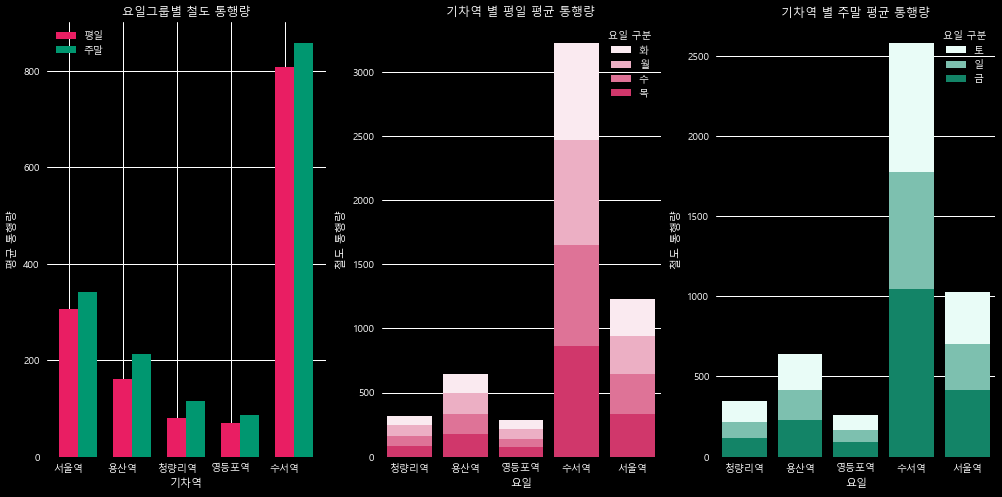

In [121]:
fig = plt.figure(figsize=(17,8))
plt.style.use('dark_background')
ax1 = fig.add_subplot(1,3,1)
bar_width = 0.35
ax1.set_facecolor('black')

label = ['서울역', '용산역', '청량리역', '영등포역', '수서역']
index = np.arange(len(label))
p1 = plt.bar(index, train_weekday_top3_total, bar_width, label='평일', color=['#E91E63'])
p2 = plt.bar(index + bar_width, train_weekend_top3_total, bar_width, label='주말', color=['#009770'])
plt.title('요일그룹별 철도 통행량')
plt.ylabel('평균 통행량')
plt.xlabel('기차역')
plt.xticks(index, label)
plt.legend((p1[0], p2[0]), ('평일', '주말'))

ax2 = fig.add_subplot(1,3,2)
sns.barplot(x='출발 지역명', y='cumsum', hue='요일 구분', data=train_weekday_top3, dodge=False, color='#E91E63')
plt.title("기차역 별 평일 평균 통행량")
plt.xlabel("요일")
plt.ylabel("철도 통행량")
ax2.set_facecolor('black')

ax3 = fig.add_subplot(1,3,3)
sns.barplot(x='출발 지역명', y='cumsum', hue='요일 구분', data=train_weekend_top3, dodge=False, color='#009770')
plt.title("기차역 별 주말 평균 통행량")
plt.xlabel("요일")
plt.ylabel("철도 통행량")
ax3.set_facecolor('black')

plt.show()

먼저, 수서역의 통행량이 가장 두드러지게 높은 것을 확인할 수 있습니다.  

또한 모든 역에서 주말의 통행량이 평일보다 더 높게 나타났으며, 평일과 주말을 막론하고 요일별 통행량 비율의 차이는 뚜렷하게 나타나지 않았습니다.

### 3.3. 버스 이용 현황

통행 수단 중 버스 이용 현황을 살펴봅니다. 

#### 3.3.1. 주요 터미널 선정

출발지역 코드별로 통행량의 평균을 비교하여 주요 버스 터미널을 선정합니다. 

In [99]:
# 2019 + 2020
bus = pd.concat([bus_19, bus_20], ignore_index=True)

# 0인 행 제거
idx_nm_1 = bus[bus['버스 통행 인원'] == 0].index
bus = bus.drop(idx_nm_1)

# 운행 일자 별 각 출발 지역 코드의 철도/버스 통행 인원 (그 터미널/역의 하루 동안 통행한 인원 합계)
bus_pivot = bus.pivot_table(index = ["운행 일자", "출발 지역 코드", "출발 시도 명", "출발 시군구 명"], 
                 aggfunc = "sum", 
                 values = "버스 통행 인원")

# 접근하기 쉽도록 reset_index
bus_daily = bus_pivot.reset_index()
bus_daily_pivot = bus_daily.pivot_table(index = ["출발 지역 코드", "출발 시도 명", "출발 시군구 명"], 
                 aggfunc = "mean", 
                 values = "버스 통행 인원")

In [100]:
# Top 3
bus_rank = bus_daily_pivot.sort_values(by='버스 통행 인원', ascending=False)
bus_rank.head(10)

,,,버스 통행 인원
출발 지역 코드,출발 시도 명,출발 시군구 명,
1165010700,서울특별시,서초구,49604.546816
1121510,서울특별시,광진구,19368.228464
1165010,서울특별시,서초구,10272.217228
1150010,서울특별시,강서구,3871.501873
1121510300,서울특별시,광진구,3322.561798
1165010800,서울특별시,서초구,1235.189922
1171010100,서울특별시,송파구,789.161049
1168010,서울특별시,강남구,361.795181
1171010900,서울특별시,송파구,349.171206


표에서의 출발 지역 코드, 출발 시도 명, 출발 시군구 명을 매칭하면 다음과 같이 Top3 버스 터미널을 선정할 수 있습니다.

<br>

**[선정 결과]**

[ 버스 터미널 - 출발 지역 코드 - 지역 ]

1. 서울고속버스터미널 / 센트럴시티터미널 - 1165010700 - 서초구 반포동

2. 동서울종합터미널 - 1121510300 - 광진구 구의동

3. 서울남부터미널 - 1165010800 - 서초구 서초동

<br>

그 외에도, <br>

- 잠실역 시외버스 정류소 - 1171010100 - 송파구 잠실동
- 장지역 시외버스 정류소 - 1171010900 - 송파구 장지동
- 가락시장 시외버스 정류소 - 1171010700 - 송파구 가락동
- 상봉터미널 - 1126010200 - 중랑구 상봉동
- 1121510 - 광진구
- 1165010 - 서초구
- 1150010 - 강서구
- 1171010 - 송파구


In [101]:
bus_code = ['1165010700', '1121510300', '1165010800']
bus_name = ['서울고속/센트럴', '동서울종합', '서울남부']

#### 3.3.2. 전처리

평일/주말 데이터를 구분하여 생성합니다.

In [102]:
# 평일
bus_20_weekday = bus_20[(bus_20['요일 구분'] == '월') | (bus_20['요일 구분'] == '화') | (bus_20['요일 구분'] == '수') | (bus_20['요일 구분'] == '목') ]
weekday = bus_20_weekday['요일 구분'].unique()
bus_rank1_20 = bus_20_weekday[(bus_20_weekday['출발 지역 코드'] == bus_code[0])]
bus_rank2_20 = bus_20_weekday[(bus_20_weekday['출발 지역 코드'] == bus_code[1])]
bus_rank3_20 = bus_20_weekday[(bus_20_weekday['출발 지역 코드'] == bus_code[2])]
bus_weekday_top3 = pd.concat([bus_rank1_20, bus_rank2_20, bus_rank3_20], ignore_index=True)
bus_weekday_top3_total = bus_weekday_top3.groupby(['출발 지역 코드']).mean()['버스 통행 인원']
for i in range(3):
  bus_weekday_top3.loc[bus_weekday_top3['출발 지역 코드'] == bus_code[i], '출발 지역명'] = bus_name[i]
bus_weekday_top3 = bus_weekday_top3.pivot_table(index=['출발 지역명', '요일 구분'], 
                             aggfunc='mean',
                             values = '버스 통행 인원').reset_index()
bus_weekday_top3['cumsum'] = bus_weekday_top3.groupby(['출발 지역명'])['버스 통행 인원'].cumsum(axis=0)
bus_weekday_top3 = bus_weekday_top3.sort_values(by=['출발 지역명', '요일 구분'], ascending=False)

# 주말
bus_20_weekend = bus_20[(bus_20['요일 구분'] == '금') | (bus_20['요일 구분'] == '토') | (bus_20['요일 구분'] == '일')]
weekend = ['금', '토', '일']
bus_rank1_20_2 = bus_20_weekend[(bus_20_weekend['출발 지역 코드'] == bus_code[0])]
bus_rank2_20_2 = bus_20_weekend[(bus_20_weekend['출발 지역 코드'] == bus_code[1])]
bus_rank3_20_2 = bus_20_weekend[(bus_20_weekend['출발 지역 코드'] == bus_code[2])]
bus_weekend_top3 = pd.concat([bus_rank1_20_2, bus_rank2_20_2, bus_rank3_20_2], ignore_index=True)
bus_weekend_top3_total = bus_weekend_top3.groupby(['출발 지역 코드']).mean()['버스 통행 인원']
for i in range(3):
  bus_weekend_top3.loc[bus_weekend_top3['출발 지역 코드'] == bus_code[i], '출발 지역명'] = bus_name[i]
bus_weekend_top3 = bus_weekend_top3.pivot_table(index=['출발 지역명', '요일 구분'], 
                             aggfunc='mean',
                             values = '버스 통행 인원').reset_index()
bus_weekend_top3['cumsum'] = bus_weekend_top3.groupby(['출발 지역명'])['버스 통행 인원'].cumsum(axis=0)
bus_weekend_top3 = bus_weekend_top3.sort_values(by=['출발 지역명', '요일 구분'], ascending=False)

#### 3.3.3. 요일별 통행량 비교

2019년과 2020년의 요일별 버스 통행량을 나타냅니다. 

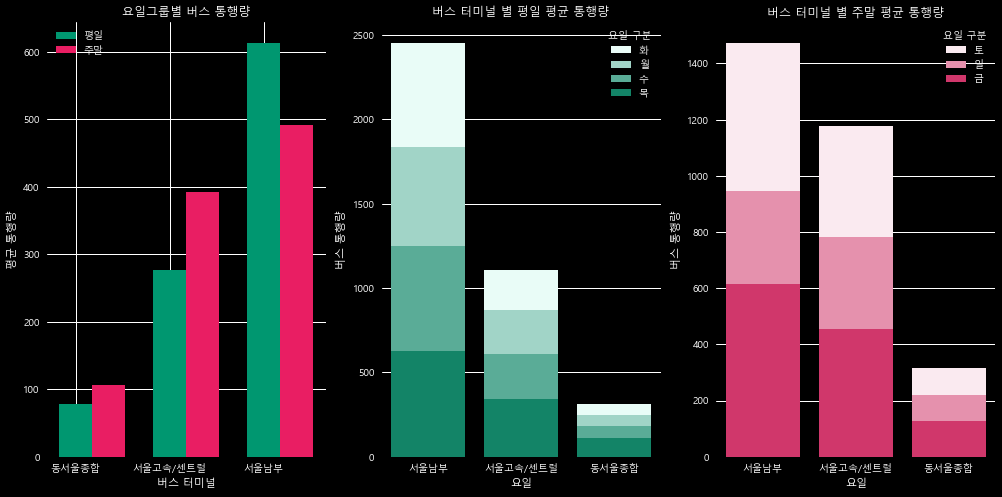

In [103]:
fig = plt.figure(figsize=(17,8))
plt.style.use('dark_background')
ax1 = fig.add_subplot(1,3,1)
bar_width = 0.35
ax1.set_facecolor('black')

label = ['동서울종합', '서울고속/센트럴', '서울남부']
index = np.arange(len(label))
p1 = plt.bar(index, bus_weekday_top3_total, bar_width,label='평일', color=['#009770'])
p2 = plt.bar(index + bar_width, bus_weekend_top3_total, bar_width,label='주말', color=['#E91E63'])

plt.title('요일그룹별 버스 통행량')
plt.ylabel('평균 통행량')
plt.xlabel('버스 터미널')
plt.xticks(index, label)
plt.legend((p1[0], p2[0]), ('평일', '주말'))

ax2 = fig.add_subplot(1,3,2)
sns.barplot(x='출발 지역명', y='cumsum', hue='요일 구분', data=bus_weekday_top3, dodge=False, color='#009770')
plt.title("버스 터미널 별 평일 평균 통행량")
plt.xlabel("요일")
plt.ylabel("버스 통행량")
ax2.set_facecolor('black')

ax3 = fig.add_subplot(1,3,3)
sns.barplot(x='출발 지역명', y='cumsum', hue='요일 구분', data=bus_weekend_top3, dodge=False, color='#E91E63')
plt.title("버스 터미널 별 주말 평균 통행량")
plt.xlabel("요일")
plt.ylabel("버스 통행량")
ax3.set_facecolor('black')

plt.show()

서울남부 터미널은 강남,서초,교대 등에서 알 수 있듯이 상업지구의 성격을 가지기 때문에, 평일의 통행량이 더 높게 나타나는 것으로 보입니다. 반면 동서울종합 터미널, 서울고속/센트럴 터미널 등은 기차와 유사하게 주말의 통행량이 더 높게 나타났습니다.

또한 평일 평균 통행량의 비율은 세 터미널 모두 비슷한 분포를 보이나, 전체적으로 금요일이 약간 많은 경향을 보이기는 합니다.


위 결과를 바탕으로 선정한 주요 기차역과 터미널을 지도에 시각화하였습니다.

folium을 바탕으로 구성되었고 구별로 영역을 나누기 위해 https://github.com/PinkWink/DataScience/tree/master/data 에서 **skorea_municipalities_geo_simple.json**를 다운받아 사용하였습니다.

In [104]:
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [105]:
#기본 맵 정의
gps_plat = pd.read_csv("서울시_주요_기차역+터미널_좌표.csv")

f = folium.Figure(width=700, height=400)
map = folium.Map(location=[37.5502, 126.982], zoom_start=11).add_to(f)
map.choropleth(geo_data=geo_str, fill_color = '#BEEFFF')

train = gps_plat.loc[:5]
minal = gps_plat.loc[6:]
minal.reset_index(drop=True, inplace=True)

#기차역 좌표 추가
for i in range(len(train)):
  x = train['위도'][i]
  y = train['경도'][i]
  folium.Marker([x, y], tooltip=train['이름'][i], popup=train['이름'][i]).add_to(map)

#버스터미널 좌표 추가
for i in range(len(minal)):
  x = minal['위도'][i]
  y = minal['경도'][i]
  folium.Marker([x, y], popup=minal['이름'][i], tooltip=minal['이름'][i], icon=folium.Icon(color='green', icon='star')).add_to(map)

map

**※ 마커에 마우스를 가져다 대시면 해당 플랫폼의 명칭을 확인하실 수 있습니다.**

<hr>

## **4.안전한 귀향을 위한 안내서**

<hr>

서론부터 본론에 걸쳐 여러 방법론을 통해 **포스트 코로나 시대로 인한 통행수단 이용 패턴과 동향**에 대해 알아보았습니다. 

본론 3에서는 시도별 **주요 도시를 세분화**한 후, 통행량을 기준으로 **서울의 주요 기차역과 터미널**을 선정하였고,

이에 따라 본론 4에서는 서울에서 타 도시로 이동하는 인원을 분산하기 위한 방안으로 **안전한 귀향을 위한 안내서**를 제작하고자 합니다.

안내서를 제작하는 과정에서 저희는 **서울에서 출발하는 이용자의 위치를 세분화**합니다.

이를 통해 보다 더 **'이용자만을 위한'** 맞춤 정보를 제공할 수 있습니다. 또한, 이용자들로 하여금 출발지와 목적지에 따라 한산한 요일과 통행수단을 안내받을 수 있도록 합니다.



저희 안내서는 사용자가 출발지부터 도착지까지 가는 다양한 경로 중,
최대한 타인과의 접촉을 줄일 수 있는 '안전한 경로'를 선택하는 데 도움을 주고자 합니다. 

**[안내서가 제공되는 프로세스]**는 다음과 같습니다.

1. 먼저, 사용자로부터 출발지, 도착지를 입력받습니다.
가장 먼저 입력받은 출발지를 기준으로 이용 가능하면서 가까운 플랫폼들을 선정합니다.
이는 **도착지까지 운행하면서, 사용자의 출발지로부터 가장 가까운** 플랫폼이라는 뜻이기도 합니다.
플랫폼은 기차역/고속버스터미널/시외버스터미널 각각에 대해 선정합니다.

2. 사용자의 출발지와 선정된 플랫폼 좌표를 지도를 통해 나타냅니다. 
이를 통해 사용자는 출발지와 플랫폼 간의 대략적인 거리를 확인할 수 있습니다.

3. 다음으로, 보여드릴 그래프 세 개는 선정된 플랫폼들의 혼잡도 정보를 제공합니다.
이때 혼잡도는 **각 플랫폼의 통행량 정도**로 정의하였습니다.
사용자는 이 혼잡도에 대한 그래프들을 통해 '귀향을 위해 어떤 통행 수단을 선택할 지'에 대한 고민을 합리적으로 해결할 수 있습니다.

    ① 첫번째 그래프는 위에서 선정된 기차역/고속버스터미널/시외버스터미널 플랫폼 각각의 혼잡도를 요일별로 비교합니다.
       요일별 평균으로 세분화해서 나타내었기 때문에 사용자는 자신이 출발하는 요일에 맞춘 정보를 확인할 수 있습니다.

    ② 두번째 그래프는 입력받은 출발지와 도착지가 모두 동일한 경우의 통행 수단 별 인원 비율을 제공합니다. 
       이 차트에서 사용자는 자신과 동일한 출발/도착지를 가진 다른 사람들은 어떤 통행 수단을 선택했는가에 대한 비율을 살펴볼 수 있습니다.

    ③ 마지막으로 안내서는 사용자가 입력한 도착지를 기준으로, 도착지 인접지역의 통행 수단 별 통행 인원 분포를 보여줍니다.
       이는 사용자에게 추천한 플랫폼들만이 아니라 전체를 출발지로 두며, 도착지 인접지역의 통행량 및 통행 수단 별 비율 정보를 제공하여 사용자로 하여금 자신의 고향의 인접지역까지 이동하는 사람들은 얼마나 있는지, 또 통행수단별 비율은 어느 정도인지 확인할 수 있게 합니다.
        
<br>

이제부터 구체적인 프로세스를 살펴보도록 하겠습니다.

### 4.1. 안내서 제작 프로세스

#### 4.1.1. 안내서 제작을 위한 새로운 데이터 목록

**1. (자체제작) 인접플랫폼.csv**
- 출발지로 정의되는 서울특별시 내의 25개 구에 대해, 
주요 터미널/기차역을 거리 기준 가까운 순서대로 나열해 저장해놓은 데이터셋입니다. 

ex) 주요 기차역 중 도봉구와 가까운 순서대로 나열한 결과는 다음과 같습니다. (상봉/청량리/서울/용산/영등포/수서)

In [106]:
near = pd.read_csv("인접플랫폼.csv")
near.head()

,이름,기차역,터미널
0,도봉구,"상봉역,청량리역,서울역,용산역,영등포역,수서역","동서울종합터미널,서울고속버스터미널,센트럴시티터미널,서울남부터미널"
1,노원구,"상봉역,청량리역,서울역,용산역,영등포역,수서역","동서울종합터미널,서울고속버스터미널,센트럴시티터미널,서울남부터미널"
2,강북구,"청량리역,상봉역,서울역,용산역,영등포역","동서울종합터미널,서울고속버스터미널,센트럴시티터미널,서울남부터미널"
3,성북구,"청량리역,서울역,상봉역,용산역,영등포역","동서울종합터미널,서울고속버스터미널,센트럴시티터미널,서울남부터미널"
4,동대문구,"청량리역,상봉역,서울역,용산역,영등포역","동서울종합터미널,서울고속버스터미널,센트럴시티터미널,서울남부터미널"


**2. (자체제작) 도착터미널구분.csv**

- 제주를 제외한 국내 도/광역시/특별시 총 15개를 도착지로 정의하며,
이 도착지로 가는 차편을 운행하는 고속버스/시외버스 터미널 및 기차역에 대한 정보를 담은 데이터셋입니다.

ex) 강원도로 가는 차편이 있는 고속/시외/기차역은 서울고속버스터미널/동서울종합터미널/서울,용산,청량리역입니다.

In [107]:
dest = pd.read_csv("도착터미널구분.csv")
dest.head()

,도착지,고속버스,시외버스,기차
0,부산광역시,"동서울종합터미널,서울고속버스터미널","서울남부터미널, 동서울종합터미널","서울역,용산역,영등포역,수서역"
1,대구광역시,NaN,NaN,"서울역,용산역,영등포역,수서역"
2,인천광역시,NaN,동서울종합터미널,NaN
3,광주광역시,"동서울종합터미널,센트럴시티터미널",서울남부터미널,"서울역,용산역"
4,대전광역시,"동서울종합터미널,센트럴시티터미널,서울고속버스터미널","서울남부터미널,동서울종합터미널","서울역,용산역,영등포역"


**3. (자체제작) 서울시_주요_기차역+터미널_좌표**

In [108]:
gps_plat = pd.read_csv("서울시_주요_기차역+터미널_좌표.csv")
gps_plat

,이름,위도,경도
0,서울역,37.556030,126.972248
1,용산역,37.530186,126.964812
2,수서역,37.487496,127.101324
3,영등포역,37.515609,126.907129
4,청량리역,37.581548,127.048974
5,상봉역,37.596801,127.084762
6,서울고속버스터미널,37.505612,127.007071
7,동서울종합터미널,37.533601,127.093367
8,서울남부터미널,37.484465,127.016054
9,센트럴시티터미널,37.505080,127.003227


**5. 서울시 행정구역 시군구 정보**

- 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [109]:
gps_gu = pd.read_csv("서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv", encoding='cp949')
gps_gu.head()

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155


#### 4.1.2 출발/도착지에 따른 이용 터미널/기차역 선정

**[선정 프로세스]**

- 출발지는 서울특별시 25개의 지역구로 한정합니다.
- [인접플랫폼.csv]와 [도착터미널구분.csv]를 활용하여 아래 프로세스를 따라 터미널과 기차역을 선정합니다.

① 사용자가 출발지, 도착지를 함수의 인자로 전달합니다.
 
② 먼저 '도착터미널구분'을 이용해 해당 도착지로 운행하는 플랫폼을 정의합니다. 

③ 이후 '인접플랫폼'을 이용해 해당 출발지에서 가까운 순서로 나열된 데이터를 취합니다.

④ 이를 이용해 출발지에서 가까운 순서대로 순회하며, 해당 도착지로 운행하는 플랫폼을 탐색합니다.

⑤ 따라서 최종적으로 얻은 결과는 도착지까지 운행하는 차편이 있으면서 출발지에서 가장 가까운 플랫폼입니다.

#### 4.1.3. 안내서 제작을 위한 함수 생성

출발지와 도착지가 주어졌을 때, 출발지와 인접하면서 도착지까지 운행하는  노선이 있는 플랫폼을 제시하고,

플랫폼별 통행인원 정보를 시각화하여 나타내는 안내서를 제작하기 위한 함수를 생성하였습니다.  

새롭게 생성한 함수 목록은 다음과 같습니다.

[함수목록]
- to_query
- covid_count_crawler
- find_res_plat
- where 
- view_map
- find_platform
- trans_graph
- pie_plot
- dest_graph
- final_guide 


1) to_query : 인자로 전달한 플랫폼의 출발지역코드를 가진 행을 필터링하기 위하여 쿼리를 작성해주는 함수

In [110]:
def to_query(location, loc):
  start = "출발지역코드 == "
  col = "'"
  loc_code = location[loc]
  return (start + col + loc_code + col), loc_code

2) covid_count_crawler: 당일 서울 확진자수와 전국 확진자 수를 반환해주는 함수

In [111]:
def covid_count_crawler():
    driver = webdriver.Chrome(executable_path="C:\chromedriver\chromedriver.exe")
    driver.get("https://www.seoul.go.kr/coronaV/coronaStatus.do")
    try:
        #서울 확진자
        covid_seoul = driver.find_element_by_class_name("status-seoul")
        count_seoul = covid_seoul.find_element_by_class_name("counter")
        confirmed_seoul = count_seoul.text
        
        #전국 확진자
        covid_korea = driver.find_element_by_class_name("status-korea")
        count_korea = covid_korea.find_element_by_class_name("counter")
        confirmed_korea = count_korea.text
        
        # 시간
        time = covid_seoul.text[4:22]
        
    except:
        print("Error")
        
    driver.close()
    return confirmed_seoul, confirmed_korea, time

3) find_res_plat : 도착지로 가는 플랫폼과 출발지에서 가까운 플랫폼을 인자로 받아, 도착지까지 운행하면서 출발지에서 가장 가까운 플랫폼을 출력해주는 함수

In [112]:
def find_res_plat(dest, near):
  res = ""
  for i in range(len(near)):
    if near[i] in dest:
      res += near[i]
      break
  return res

4) where : 도착지로 도시명이 입력되었을때, 해당 시도 명을 반환해주는 함수

In [113]:
def where(destination):
    areas = ["부산광역시", "대구광역시", "광주광역시", "대전광역시", "울산광역시", "세종특별자치시", "인천광역시",
            "경기도", "충청북도", "충청남도", "전라북도", "전라남도", "경상북도", "경상남도", "강원도"]
    for a in areas:
        if destination in a:
            destin = a
            return destin
    destin = bo_2020_drop[bo_2020_drop["도착 시군구 명"].str.contains(destination)].iloc[0,7]
    return destin

5) view_map : 최종 플랫폼으로 선정된 데이터와 출발지(구)를 folium 지도상으로 시각화하는 함수

In [114]:
def view_map(start_region, res_plat):

  #한글 셋팅 및 시군구 분리
  plt.rc('font', family='Malgun Gothic') 
  geo_path = '02. skorea_municipalities_geo_simple.json'
  geo_str = json.load(open(geo_path, encoding='utf-8'))

  #기본 맵 정의
  f = folium.Figure(width=700, height=400)
  map = folium.Map(location=[37.5502, 126.982], zoom_start=11).add_to(f)
  map.choropleth(geo_data=geo_str, fill_color = '#BEEFFF')

  #출발지 빨간색으로 체크
  gu_xy = gps_gu[gps_gu['시군구명_한글'] == start_region][['위도', '경도']].values
  gu_x = gu_xy[0][0]
  gu_y = gu_xy[0][1]
  folium.Marker([gu_x, gu_y], popup=start_region, tooltip=start_region, icon=folium.Icon(color='red', icon='star')).add_to(map)

  #최종 선정된 플랫폼
  
  if True:
    for i in range(len(res_plat)):
        plat_xy = gps_plat[gps_plat['이름'] == res_plat[i]][['위도', '경도']].values
        try:
            plat_x = plat_xy[0][0]
            plat_y = plat_xy[0][1]
            folium.Marker([plat_x, plat_y], tooltip=res_plat[i], popup=res_plat[i]).add_to(map)
        except:
            pass
  else:
     for i in range(len(res_plat)):
        plat_xy = gps_plat[gps_plat['이름'] == res_plat[i]][['위도', '경도']].values
        plat_x = plat_xy[0][0]
        plat_y = plat_xy[0][1]
        folium.Marker([plat_x, plat_y], tooltip=res_plat[i], popup=res_plat[i]).add_to(map)
  display(map)
  return map

6) find_platform : 출발지, 도착지를 인자로 전달하며, 도착지까지 운행하면서 출발지에서 가장 가까운 플랫폼(철도, 고속버스, 시외버스 각각 1개)을 선정하며, 이 플랫폼들에 해당되는 출발지역코드를 가진 행들만을 필터링 해주는 함수

In [115]:
def find_platform(df, start_region, destination):

  #필요한 정보들
  destins = where(destination)
  df.rename(columns={"출발 지역 코드":"출발지역코드"}, inplace=True)
  near = pd.read_csv("인접플랫폼.csv")
  dest = pd.read_csv("도착터미널구분.csv")[:15]
  location = {'서울역' : '1117010700', '용산역' : '1117012800', '수서역' : '1168011500', '청량리역' : '1123010400', '영등포역' : '1156010100', '상봉역' : '1126010200',
            '서울고속버스터미널' : '1165010700', '서울남부터미널' : '1165010800', '동서울종합터미널' : '1121510300', '센트럴시티터미널' : '1165010700'}
  
  print("다음으로, 출발지 <" + start_region + ">에서 도착지 <" + destination + ">까지 가는 안전한 귀향길을 안내해 드리겠습니다.")
  
  #1. 도착지로 운행하는 플랫폼 목록 (express: 고속버스, inter: 시외버스, train: 기차역)
  dest_list = dest[dest['도착지'].str.contains(destins)]

  try:
    dest_express = dest_list['고속버스'].values[0].split(",")
  except:
    dest_express = []
  try:
    dest_inter = dest_list['시외버스'].values[0].split(",")
  except:
    dest_inter = []
  try:  
    dest_train = dest_list['기차'].values[0].split(",")
  except:
    dest_train = []


  #도착지로 운행하는 통행 수단에 대한 안내 메시지
  dest_ava_list = []
  if len(dest_express) >= 1:
    dest_ava_list.append("고속버스")
  if len(dest_inter) >= 1:
    dest_ava_list.append("시외버스")
  if len(dest_train) >= 1:
    dest_ava_list.append("기차")

  #2. 주요 터미널/기차역 중 출발지와 가까운 순서로 정렬한 것.
  near_list = near[near['이름'] == start_region]
  near_terminal = near_list['터미널'].values[0].split(",")
  near_train = near_list['기차역'].values[0].split(",")

  #3. 위의 두 데이터를 고려한, 도착지까지 운행하면서 출발지와 가장 가까운 터미널역 선정
  res_plat = []
    
  temp_plat = find_res_plat(dest_train, near_train)
  if temp_plat == "":
        pass
  else:
    res_plat.append(temp_plat)
    
  temp_plat = find_res_plat(dest_express, near_terminal)
  if temp_plat == "":
        pass
  else:
    res_plat.append(temp_plat)
  
  temp_plat = find_res_plat(dest_inter, near_terminal)
  if temp_plat == "":
        pass
  else:
    res_plat.append(temp_plat)   
        
  print("목적지인 "+ destination + "까지 운행하면서, 출발지와 가장 가까운 플랫폼은 다음과 같습니다.\n")
  if len(res_plat) == 3:
    print(" 1. 기차:", res_plat[0], "\n", "2. 고속버스:", res_plat[1], "\n", "3. 시외버스:", res_plat[2],"\n"*2)
  else:
      if destins == "대구광역시": #데이터 상으로 운행하는 통행 수단이 기차(철도) 하나뿐인 대구광역시 예외처리
          print(" 1. 기차:", res_plat[0],"\n"*2)
      elif destins == "인천광역시": #데이터 상으로 운행하는 통행 수단이 시외버스 하나뿐인 인천광역시 예외처리
          print(" 3. 시외버스:", res_plat[0],"\n"*2)

  #4. 결과로 선정된 플랫폼을 출발로 하는 데이터 행 필터링
  query = ""
  count = 0
  loc_code = []
  for i in range(len(res_plat)):
    if res_plat[i] != '':
      q, code = to_query(location, res_plat[i])
      query += q
      count += 1
      loc_code.append(code)
      if (i != len(res_plat)-1):
        query += " or "

  #예외처리규정
  if query[-3:] == 'or ':
    query = query[:-4]
  print("한 눈에 보시기 편하게 플랫폼 별 위치를 지도로 보여드리겠습니다.", "\n")
  map = view_map(start_region, res_plat)
  
  return df.query(query), map, loc_code, res_plat

7) trans_graph : 도착지까지 가는 각 플랫폼(철도, 고속버스, 시외버스)의 요일별 일평균 통행량을 그래프로 시각화하는 함수

In [116]:
def trans_graph(df, loc_code, res_plat, destins):
    nums = ["철도 통행 인원", "고속버스 통행 인원", "시외버스 통행 인원"]
    names = ["(기차)", "(고속버스)", "(시외버스)"]
    days = ["월", "화", "수", "목", "금", "토", "일"]
    colors = ["#009770", "#FFDF65", "#E91E63"]
    if destins == "대구광역시":#데이터 상으로 운행하는 통행 수단이 기차(철도) 하나뿐인 대구광역시 예외처리
        df_1 = df.groupby('출발지역코드').get_group(loc_code[0])
        df_1 = df_1[df_1[nums[0]]!=0]
        avgs = []
        for d in range(len(days)):
            new = df_1.groupby("요일 구분").get_group(days[d])
            avg = new[nums[0]].sum()//len(new["운행 일자"].unique())
            avgs.append(avg)
        fig = go.Figure(data=[go.Bar(x=days, y=avgs, marker_color="#009770")])
        fig.update_layout(width=700, template='plotly_dark',title_text="2020년 "+res_plat[0]+names[0]+ " 요일별 일평균 통행인원", )
        fig.show()
    elif destins == "인천광역시":#데이터 상으로 운행하는 통행 수단이 시외버스 하나뿐인 인천광역시 예외처리
        df_1 = df.groupby('출발지역코드').get_group(loc_code[0])
        df_1 = df_1[df_1[nums[2]]!=0]
        avgs = []
        for d in range(len(days)):
            new = df_1.groupby("요일 구분").get_group(days[d])
            avg = new[nums[2]].sum()//len(new["운행 일자"].unique())
            avgs.append(avg)
        fig = go.Figure(data=[go.Bar(x=days, y=avgs, marker_color="#E91E63")])
        fig.update_layout(width=700, template='plotly_dark',title_text="2020년 "+res_plat[0]+names[2]+ " 요일별 일평균 통행인원", )
        fig.show()
    else:
        fig = make_subplots(rows=1, cols=3, subplot_titles=(res_plat[0]+names[0],res_plat[1]+names[1],res_plat[2]+names[2]))
        for c in range(len(loc_code)):
            df_1 = df.groupby('출발지역코드').get_group(loc_code[c])
            df_1 = df_1[df_1[nums[c]]!=0]
            avgs = []
            #요일별로 묶기
            for d in range(len(days)):
                new = df_1.groupby("요일 구분").get_group(days[d])
                avg = new[nums[c]].sum()//len(new["운행 일자"].unique())
                avgs.append(avg)
            fig.add_trace(go.Bar(x=days, y=avgs, name=nums[c], marker_color=colors[c] ),row=1, col=c+1)
        fig.update_layout(template='plotly_dark',title_text="2020년 요일별 일평균 통행인원")
        fig.show()

8) dest_graph : 도착지를 기준으로 세부 시군구에 따른 일평균 통행 수단별 통행 인원을 그래프로 시각화하는 함수

In [117]:
def dest_graph(destination):
    a = areas.index(where(destination))
    kk_20 = bo_2020_drop.groupby('도착 시도 명').get_group(where(destination))
    all_kk = pd.DataFrame(index=range(0,6), columns = ["년도", "도착 시군구 명", "철도 통행 인원", "시외버스 통행 인원", "고속버스 통행 인원"])
    nums = ["철도 통행 인원", "시외버스 통행 인원", "고속버스 통행 인원"]
    for i in range(len(sigungu[a])):
        all_kk["도착 시군구 명"][i] = sigungu[a][i]
        all_kk["년도"][i] = 2020
        kk_20_1 = kk_20[kk_20['도착 시군구 명'].str.contains(sigungu[a][i])]
        for n in range(len(nums)):
            new_20 = kk_20_1[kk_20_1[nums[n]]!=0]
            avg_20 = new_20[nums[n]].sum()//len(new_20["운행 일자"].unique())    
            all_kk[nums[n]][i] = avg_20
    trace1 = go.Bar(x=all_kk["도착 시군구 명"], y=all_kk["철도 통행 인원"], name='철도', marker_color="#009770")
    trace2 = go.Bar(x=all_kk["도착 시군구 명"], y=all_kk["시외버스 통행 인원"], name='시외버스', marker_color="#E91E63")
    trace3 = go.Bar(x=all_kk["도착 시군구 명"], y=all_kk["고속버스 통행 인원"], name='고속버스', marker_color="#FFDF65")
    data = [trace1, trace2, trace3]
    title = "2020년 "+areas[a]+" 일평균 통행 수단 별 통행 인원 분포"
    layout = go.Layout(template='plotly_dark',width=700, title=title, barmode='stack')
    fig = go.Figure(data=data, layout=layout)
    pyo.iplot(fig)

9) pie_plot : 출발지와 도착지를 모두 고려한 철도와 버스터미널의 통행인원비율을 그래프로 시각화하는 함수

In [118]:
def pie_plot(destination, result):
    dict_train = {'서울역':'1117010700', '용산역':'1117012800', '수서역': '1168011500', '영등포역':'1156010100', '청량리역': '1123010400'}
    dict_bus = {'서울고속버스터미널':'1165010700', '센트럴시티터미널':'1165010700','동서울종합터미널':'1121510300', '서울남부터미널': '1165010800'}

    result_train = bo[(bo['출발 지역 코드'] == dict_train[result[0]]) & (bo['도착 시도 명'] == destination)]
    result_bus1 = bo[(bo['출발 지역 코드'] == dict_bus[result[1]]) & (bo['도착 시도 명'] == destination)]
    result_bus2 = bo[(bo['출발 지역 코드'] == dict_bus[result[2]]) & (bo['도착 시도 명'] == destination)]
    means = [result_train['철도 통행 인원'].mean(), result_bus1['버스 통행 인원'].mean(), result_bus2['버스 통행 인원'].mean()]

    if dict_bus[result[1]] != dict_bus[result[2]]: 
        ratio = [means[0], means[1], means[2]]
        labels = [result[0], result[1], result[2]]
        df = px.data.tips()
        fig = px.pie(df, values=ratio, names=labels, color_discrete_sequence=["#009770", "#FFDF65", "#E91E63"])
        fig.update_layout(width=600, height=500, template='plotly_dark')
        fig.update_layout(title={'text':'출발지와 목적지 모두 동일한 경우의 철도/버스 평균 인원 비율', 'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
        fig.show()
    else: #고속버스 터미널과 시외버스 터미널이 같은 경우 출발지가 동일하기 때문에 통행 인원을 합산
        ratio = [means[0], means[1]]
        labels = [result[0], result[1]]
        df = px.data.tips()
        fig = px.pie(df, values=ratio, names=labels, color_discrete_sequence=["#009770", "#E91E63"])
        fig.update_layout(width=600, height=500, template='plotly_dark')
        fig.update_layout(title={'text':'출발지와 목적지 모두 동일한 경우의 철도/버스 평균 인원 비율', 'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
        fig.show()

10) final_guide : 위 함수들을 모두 종합하여 안내서를 반환하는 함수

In [119]:
def final_guide(start_region, destination):
    new_destin = where(destination)
    print("\n"*2," "*9, "---"*35,"\n")
    print(" "*42, "<< 당신의 안전한 귀향을 위한 안내서 >> \n")
    print(" "*10, "---"*35,"\n"*3)
    
    # 안내서 Start
    print("안녕하세요. 당신의 안전한 귀향을 위한 안내서입니다.\n")
    print("저희 안내서는 사용자가 출발지부터 도착지까지 가는 다양한 경로 중, \n최대한 사람들을 덜 만날 수 있는 '안전한 경로'를 선택하는 데 도움을 줄 수 있습니다.\n\n")
    
    #코로나 일일 확진자 현황 소개
    print("먼저, 오늘의 코로나 확진자 현황을 살펴보겠습니다.\n")
    cf_seoul, cf_korea, time = covid_count_crawler()
    print(time, "코로나 확진자는 다음과 같습니다.\n")
    print("    1. 전국 확진자 : ", cf_korea, "명")
    print("    2. 서울 확진자 : ", cf_seoul, "명\n")
    print("이용에 참고하시길 바라겠습니다. :) \n\n")
    
    #출발지 및 플랫폼 지도 소개
    df, map, loc_code, res_plat = find_platform(bo_2020, start_region, destination)
    print("\n출발지는 빨간 표식, 플랫폼은 파란 표식입니다. 플랫폼의 대략적인 위치를 파악하십시오.\n지도는 확대, 축소가 자유롭게 가능하며, 마우스를 마커에 올리면 플랫폼명도 확인하실 수 있습니다.")
    print("\n"*3+ "다음으로 보여드릴 세 그래프는 선정된 플랫폼들의 혼잡도 정보를 제공해드립니다.\n이때 혼잡도는 각 플랫폼의 통행량 정도로 정의하였습니다.")
    print("하단 그래프들이 귀향을 위한 통행 수단 선택에 도움이 되길 바랍니다.\n")
    
    #첫 번째 그래프 소개
    print("\n첫번째 그래프는 위에서 선정된 기차역/고속버스터미널/시외버스터미널 플랫폼 각각의 혼잡도를 요일별로 비교합니다.\n요일별 평균으로 세분화해서 나타내었으니 참고하시길 바랍니다.\n")
    print("마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.")
    trans_graph(df, loc_code, res_plat, new_destin)

    #두 번째 그래프
    if ("서울남부터미널" not in res_plat) and (new_destin != "인천광역시") and (new_destin != "대구광역시"):
        print("\n\n\n두 번째 그래프는 출발지가 <", start_region, "> 이고 도착지가 <", destination, "> 인 철도와 버스터미널의 통행인원비율입니다.\n")
        print("이 그래프는 입력받은 출발지와 도착지가 모두 동일한 경우의 통행 수단 별 인원 비율을 제공합니다. \n이 차트에서 자신과 동일한 출발/도착지를 가진 다른 사람들은 어떤 통행 수단을 선택했는가에 대한 비율을 살펴볼 수 있습니다.\n")
        print("마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.")
        pie_plot(new_destin, res_plat)
        
    #세 번째 그래프 소개
    print("\n\n\n마지막으로 도착지인 <", destination, "> 을 기준으로, 도착지 인접지역의 통행 수단 별 통행 인원 분포를 보여드리겠습니다.\n") 
    print("이는 추천드린 플랫폼들 뿐만 아니라 전국을 출발지로 두고 도착지가 <", destination, ">와 인접 지역인 통행량 및 통행수단 별 비율을 나타냅니다. \n이를 통해, 고향의 인접지역까지 이동하는 사람들은 얼마나 있는지, 또 통행수단별 비율은 어느 정도인지 확인하실 수 있습니다.\n")
    print("마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.")
    dest_graph(destination)

    #마무리 멘트 소개
    print("\n\n저희가 제공하는 안내서는 여기까지입니다.\n안내서가 제공하는 그래프들을 통해 안전한 통행 수단을 선택할 수 있길 바랍니다 :)")
    print("\n\n\n")
    print("\n"*2," "*9, "---"*35,"\n")
    print(" "*24,"<< 저희의 안내서를 통해 목적지인", destination, "까지 안전한 귀향길 되시길 바랍니다. >> \n")
    print(" "*10, "---"*35,"\n"*3)

### 4.2. 안전한 귀향을 위한 안내서

위의 함수들로 구성되어 완성된 안내서 예시를 보여드리겠습니다.

코로나 확진자 현황을 크롤링하기 때문에 로딩하는데에 약간의 시간이 소요될 수 있는 점 양해 부탁드립니다.





**[활용 사례1]** <br>

**노원구**에 거주하고, **천안**으로 귀향하려 하는 A씨를 위해 저희의 안내서는 다음과 같은 정보를 제공합니다.

In [120]:
#input 함수를 통해 사용자가 직접 출발지와 도착지를 입력하도록 구성하였습니다.

start= input("출발지를 지역구 단위로 입력해주세요.(예시: 종로구) : ")
end = input("목적지를 시 단위로 입력해주세요. (예시: 속초) : ")
final_guide(start, end)

출발지를 지역구 단위로 입력해주세요.(예시: 종로구) : 노원구
목적지를 시 단위로 입력해주세요. (예시: 속초) : 천안


           --------------------------------------------------------------------------------------------------------- 

                                           << 당신의 안전한 귀향을 위한 안내서 >> 

           --------------------------------------------------------------------------------------------------------- 



안녕하세요. 당신의 안전한 귀향을 위한 안내서입니다.

저희 안내서는 사용자가 출발지부터 도착지까지 가는 다양한 경로 중, 
최대한 사람들을 덜 만날 수 있는 '안전한 경로'를 선택하는 데 도움을 줄 수 있습니다.


먼저, 오늘의 코로나 확진자 현황을 살펴보겠습니다.

('20.09.03.00시 기준) 코로나 확진자는 다음과 같습니다.

    1. 전국 확진자 :  195 명
    2. 서울 확진자 :  69 명

이용에 참고하시길 바라겠습니다. :) 


다음으로, 출발지 <노원구>에서 도착지 <천안>까지 가는 안전한 귀향길을 안내해 드리겠습니다.
목적지인 천안까지 운행하면서, 출발지와 가장 가까운 플랫폼은 다음과 같습니다.

 1. 기차: 서울역 
 2. 고속버스: 서울고속버스터미널 
 3. 시외버스: 동서울종합터미널 


한 눈에 보시기 편하게 플랫폼 별 위치를 지도로 보여드리겠습니다. 




출발지는 빨간 표식, 플랫폼은 파란 표식입니다. 플랫폼의 대략적인 위치를 파악하십시오.
지도는 확대, 축소가 자유롭게 가능하며, 마우스를 마커에 올리면 플랫폼명도 확인하실 수 있습니다.



다음으로 보여드릴 세 그래프는 선정된 플랫폼들의 혼잡도 정보를 제공해드립니다.
이때 혼잡도는 각 플랫폼의 통행량 정도로 정의하였습니다.
하단 그래프들이 귀향을 위한 통행 수단 선택에 도움이 되길 바랍니다.


첫번째 그래프는 위에서 선정된 기차역/고속버스터미널/시외버스터미널 플랫폼 각각의 혼잡도를 요일별로 비교합니다.
요일별 평균으로 세분화해서 나타내었으니 참고하시길 바랍니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.





두 번째 그래프는 출발지가 < 노원구 > 이고 도착지가 < 천안 > 인 철도와 버스터미널의 통행인원비율입니다.

이 그래프는 입력받은 출발지와 도착지가 모두 동일한 경우의 통행 수단 별 인원 비율을 제공합니다. 
이 차트에서 자신과 동일한 출발/도착지를 가진 다른 사람들은 어떤 통행 수단을 선택했는가에 대한 비율을 살펴볼 수 있습니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.





마지막으로 도착지인 < 천안 > 을 기준으로, 도착지 인접지역의 통행 수단 별 통행 인원 분포를 보여드리겠습니다.

이는 추천드린 플랫폼들 뿐만 아니라 전국을 출발지로 두고 도착지가 < 천안 >와 인접 지역인 통행량 및 통행수단 별 비율을 나타냅니다. 
이를 통해, 고향의 인접지역까지 이동하는 사람들은 얼마나 있는지, 또 통행수단별 비율은 어느 정도인지 확인하실 수 있습니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.




저희가 제공하는 안내서는 여기까지입니다.
안내서가 제공하는 그래프들을 통해 안전한 통행 수단을 선택할 수 있길 바랍니다 :)






           --------------------------------------------------------------------------------------------------------- 

                         << 저희의 안내서를 통해 목적지인 천안 까지 안전한 귀향길 되시길 바랍니다. >> 

           --------------------------------------------------------------------------------------------------------- 





**[활용 사례2]** <br>

**성북구**에 거주하고, **전주**로 귀향하려 하는 B씨를 위해 저희의 안내서는 다음과 같은 정보를 제공합니다.

In [123]:
start= input("출발지를 지역구 단위로 입력해주세요.(예시: 종로구) : ")
end = input("목적지를 시 단위로 입력해주세요. (예시: 속초) : ")
final_guide(start, end)

출발지를 지역구 단위로 입력해주세요.(예시: 종로구) : 성북구
목적지를 시 단위로 입력해주세요. (예시: 속초) : 전주


           --------------------------------------------------------------------------------------------------------- 

                                           << 당신의 안전한 귀향을 위한 안내서 >> 

           --------------------------------------------------------------------------------------------------------- 



안녕하세요. 당신의 안전한 귀향을 위한 안내서입니다.

저희 안내서는 사용자가 출발지부터 도착지까지 가는 다양한 경로 중, 
최대한 사람들을 덜 만날 수 있는 '안전한 경로'를 선택하는 데 도움을 줄 수 있습니다.


먼저, 오늘의 코로나 확진자 현황을 살펴보겠습니다.

('20.09.03.00시 기준) 코로나 확진자는 다음과 같습니다.

    1. 전국 확진자 :  195 명
    2. 서울 확진자 :  69 명

이용에 참고하시길 바라겠습니다. :) 


다음으로, 출발지 <성북구>에서 도착지 <전주>까지 가는 안전한 귀향길을 안내해 드리겠습니다.
목적지인 전주까지 운행하면서, 출발지와 가장 가까운 플랫폼은 다음과 같습니다.

 1. 기차: 서울역 
 2. 고속버스: 동서울종합터미널 
 3. 시외버스: 동서울종합터미널 


한 눈에 보시기 편하게 플랫폼 별 위치를 지도로 보여드리겠습니다. 




출발지는 빨간 표식, 플랫폼은 파란 표식입니다. 플랫폼의 대략적인 위치를 파악하십시오.
지도는 확대, 축소가 자유롭게 가능하며, 마우스를 마커에 올리면 플랫폼명도 확인하실 수 있습니다.



다음으로 보여드릴 세 그래프는 선정된 플랫폼들의 혼잡도 정보를 제공해드립니다.
이때 혼잡도는 각 플랫폼의 통행량 정도로 정의하였습니다.
하단 그래프들이 귀향을 위한 통행 수단 선택에 도움이 되길 바랍니다.


첫번째 그래프는 위에서 선정된 기차역/고속버스터미널/시외버스터미널 플랫폼 각각의 혼잡도를 요일별로 비교합니다.
요일별 평균으로 세분화해서 나타내었으니 참고하시길 바랍니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.





두 번째 그래프는 출발지가 < 성북구 > 이고 도착지가 < 전주 > 인 철도와 버스터미널의 통행인원비율입니다.

이 그래프는 입력받은 출발지와 도착지가 모두 동일한 경우의 통행 수단 별 인원 비율을 제공합니다. 
이 차트에서 자신과 동일한 출발/도착지를 가진 다른 사람들은 어떤 통행 수단을 선택했는가에 대한 비율을 살펴볼 수 있습니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.





마지막으로 도착지인 < 전주 > 을 기준으로, 도착지 인접지역의 통행 수단 별 통행 인원 분포를 보여드리겠습니다.

이는 추천드린 플랫폼들 뿐만 아니라 전국을 출발지로 두고 도착지가 < 전주 >와 인접 지역인 통행량 및 통행수단 별 비율을 나타냅니다. 
이를 통해, 고향의 인접지역까지 이동하는 사람들은 얼마나 있는지, 또 통행수단별 비율은 어느 정도인지 확인하실 수 있습니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.




저희가 제공하는 안내서는 여기까지입니다.
안내서가 제공하는 그래프들을 통해 안전한 통행 수단을 선택할 수 있길 바랍니다 :)






           --------------------------------------------------------------------------------------------------------- 

                         << 저희의 안내서를 통해 목적지인 전주 까지 안전한 귀향길 되시길 바랍니다. >> 

           --------------------------------------------------------------------------------------------------------- 





해당 예시는 고속버스터미널과 시외버스터미널이 **동서울종합터미널**로 동일합니다.

이 경우, 같은 터미널이라 하더라도 보다 자세한 정보를 제공하기 위하여 고속버스와 시외버스 통행 인원을 구분하여 요일별 시각화 그래프를 제시하였습니다.

또한, 원형플롯의 경우 고속버스와 시외버스의 출발지가 동서울종합터미널로 동일하기 때문에 두 통행 수단의 인원을 합쳐서 버스 통행 인원으로 제시하였습니다.

**[활용 예시3]**

**강서구**에 거주하고, **청주**로 귀향하려 하는 C씨를 위해 저희의 안내서는 다음과 같은 정보를 제공합니다.

In [124]:
start= input("출발지를 지역구 단위로 입력해주세요.(예시: 종로구) : ")
end = input("목적지를 시 단위로 입력해주세요. (예시: 속초) : ")
final_guide(start, end)

출발지를 지역구 단위로 입력해주세요.(예시: 종로구) : 강서구
목적지를 시 단위로 입력해주세요. (예시: 속초) : 청주


           --------------------------------------------------------------------------------------------------------- 

                                           << 당신의 안전한 귀향을 위한 안내서 >> 

           --------------------------------------------------------------------------------------------------------- 



안녕하세요. 당신의 안전한 귀향을 위한 안내서입니다.

저희 안내서는 사용자가 출발지부터 도착지까지 가는 다양한 경로 중, 
최대한 사람들을 덜 만날 수 있는 '안전한 경로'를 선택하는 데 도움을 줄 수 있습니다.


먼저, 오늘의 코로나 확진자 현황을 살펴보겠습니다.

('20.09.03.00시 기준) 코로나 확진자는 다음과 같습니다.

    1. 전국 확진자 :  195 명
    2. 서울 확진자 :  69 명

이용에 참고하시길 바라겠습니다. :) 


다음으로, 출발지 <강서구>에서 도착지 <청주>까지 가는 안전한 귀향길을 안내해 드리겠습니다.
목적지인 청주까지 운행하면서, 출발지와 가장 가까운 플랫폼은 다음과 같습니다.

 1. 기차: 영등포역 
 2. 고속버스: 서울고속버스터미널 
 3. 시외버스: 서울남부터미널 


한 눈에 보시기 편하게 플랫폼 별 위치를 지도로 보여드리겠습니다. 




출발지는 빨간 표식, 플랫폼은 파란 표식입니다. 플랫폼의 대략적인 위치를 파악하십시오.
지도는 확대, 축소가 자유롭게 가능하며, 마우스를 마커에 올리면 플랫폼명도 확인하실 수 있습니다.



다음으로 보여드릴 세 그래프는 선정된 플랫폼들의 혼잡도 정보를 제공해드립니다.
이때 혼잡도는 각 플랫폼의 통행량 정도로 정의하였습니다.
하단 그래프들이 귀향을 위한 통행 수단 선택에 도움이 되길 바랍니다.


첫번째 그래프는 위에서 선정된 기차역/고속버스터미널/시외버스터미널 플랫폼 각각의 혼잡도를 요일별로 비교합니다.
요일별 평균으로 세분화해서 나타내었으니 참고하시길 바랍니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.





마지막으로 도착지인 < 청주 > 을 기준으로, 도착지 인접지역의 통행 수단 별 통행 인원 분포를 보여드리겠습니다.

이는 추천드린 플랫폼들 뿐만 아니라 전국을 출발지로 두고 도착지가 < 청주 >와 인접 지역인 통행량 및 통행수단 별 비율을 나타냅니다. 
이를 통해, 고향의 인접지역까지 이동하는 사람들은 얼마나 있는지, 또 통행수단별 비율은 어느 정도인지 확인하실 수 있습니다.

마우스를 그래프에 가져다 대시면 보다 세부적인 정보를 확인하실 수 있습니다.




저희가 제공하는 안내서는 여기까지입니다.
안내서가 제공하는 그래프들을 통해 안전한 통행 수단을 선택할 수 있길 바랍니다 :)






           --------------------------------------------------------------------------------------------------------- 

                         << 저희의 안내서를 통해 목적지인 청주 까지 안전한 귀향길 되시길 바랍니다. >> 

           --------------------------------------------------------------------------------------------------------- 





세번째는 시외버스 터미널로 **서울남부터미널**이 선정된 경우입니다.

발권OD 데이터 상에서 출발지가 서울남부터미널이 위치한 서초구 서초동인 경우, 도착지가 모두 결측값으로 처리되어있어 목적지를 확인할 수 없었습니다.

따라서, 서울남부터미널이 선정되었을시에는 원형 플롯을 출력하지 않았습니다.

이외에도
1. **대구광역시**의 경우 데이터 상으로 통행 인원(서울 출발 기준)이 기차(철도) 이용 인원만 존재하여 요일별 플롯이 기차역 1개만 출력되고, 따라서 원형 차트가 출력되지 않습니다.
2. **인천광역시**의 경우 데이터 상으로 통행 인원(서울 출발 기준)이 시외버스 이용 인원만 존재하여 요일별 플롯이 시외버스터미널 1개만 출력되고 따라서 원형 차트가 출력되지 않습니다.

총 2가지의 예외 상황이 존재합니다.

충분한 데이터가 확보되면 더욱 풍부한 정보를 담은 양질의 시각화를 제공할 수 있을 것이라 기대합니다.

---

# **결론**



## **1. 안전한 귀향을 위한 안내서의 기대효과**

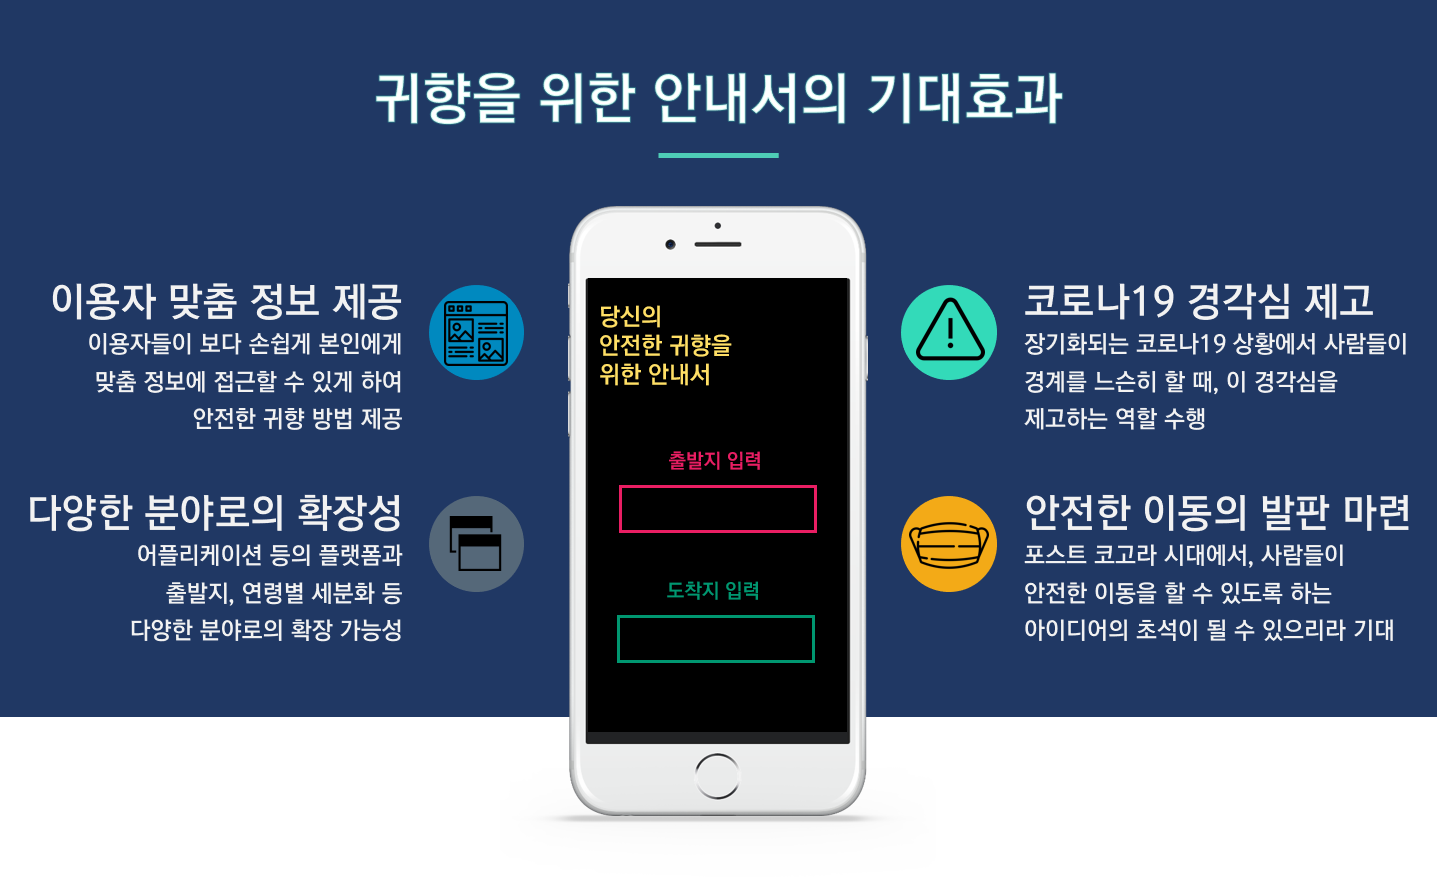

In [125]:
Image("./2.png")

[템플릿 출처](https://blog.naver.com/1st_navi/220494828244)
### **1.1. 이용자 맞춤 정보 제공**
 저희의 안내서는 귀향하는 최적의 수단과 일일 코로나 확진자수 등의 정보를 함께 제공하고 있습니다. 현재 코로나19는 전세계인의 관심사이기 때문에 매일 수많은 코로나19 관련 뉴스가 쏟아져나옵니다. 그 중 본인이 귀향하려 하는 날짜와 관련한 코로나19 정보를 찾고, 또 본인에게 맞는 정보들만 또 골라 보기는 귀찮을 수 밖에 없습니다. 저희의 안내서는 이용자가 이런 수고로움에서 벗어나고, 나아가 귀찮다는 이유로 정확한 정보를 알지 못한 채 귀향하려 하는 이용자들이 보다 손쉽게 정보에 접근할 수 있게 하여 코로나19의 위험으로부터 우회하여 안전하게 귀향할 수 있는 방법을 제공합니다.

### **1.2. 서비스의 확장성**
 저희의 안내서는 다양한 분야에서 확장성을 가집니다. 
- 1) 플랫폼의 확장 : 현재 데이콘 제출 파일 안에서 함수를 통해 구현했습니다. 이미 함수로 모듈화 되어있기 때문에 차후에 홈페이지나 어플리케이션 등의 플랫폼 구축에 용이합니다.



- 2) 출발지의 확장 : 현재 분석에서는 서울에서 출발하는 이용자를 대상으로 한 서비스를 제공하고 있습니다. 하지만 앞서 언급한 것처럼 데이터를 정제하는 과정을 거치면 언제든지 전국 지역으로 출발지를 확장할 수 있습니다. 도착지는 이미 전국 단위를 고려했기 때문에 출발지가 늘어난다면 안내서가 제공할 수 있는 정보의 범위는 무궁무진하게 넓어집니다.



- 3) 사용연령의 세분화 : 본 보고서에는 전 연령을 대상으로 하여 분석을 진행하였으나, 추후 노년층, 청년층, 장년층 등 각 연령대에 맞춰 세분화된 정보를 제공하는 방향으로 확장할 수 있습니다.

### **1.3. 코로나19 감염의 경각심을 일깨우는 알리미 역할**

 저희의 안내서는 코로나19 관련 정보(일일확진자수 등)를 제공함으로써 장기화되는 코로나19 상황 속에서 사람들의 긴장감이 느슨해질 때 그 경각심을 일깨우는 역할을 수행할 수 있습니다. 지금까지는 사람들이 외출을 자제하며 서로 조심했지만, 최근 여행 등의 여가와 관련한 수요가 증가하고 있습니다. 저희의 분석은 특히 지금처럼 사람들이 경계를 느슨히 할 때, 이를 끌어올리는 역할을 수행할 것입니다. 

<br>

## **2. 안전한 귀향을 위한 안내서의 활용 방안 예시**
귀향을 위한 안내서를 어플리케이션으로 구현할 수 있는 방안을 이미지로 제안합니다. 추가로 코레일과 같은 플랫폼 업체와 협업하는 방안을 고려해볼 수 있습니다.

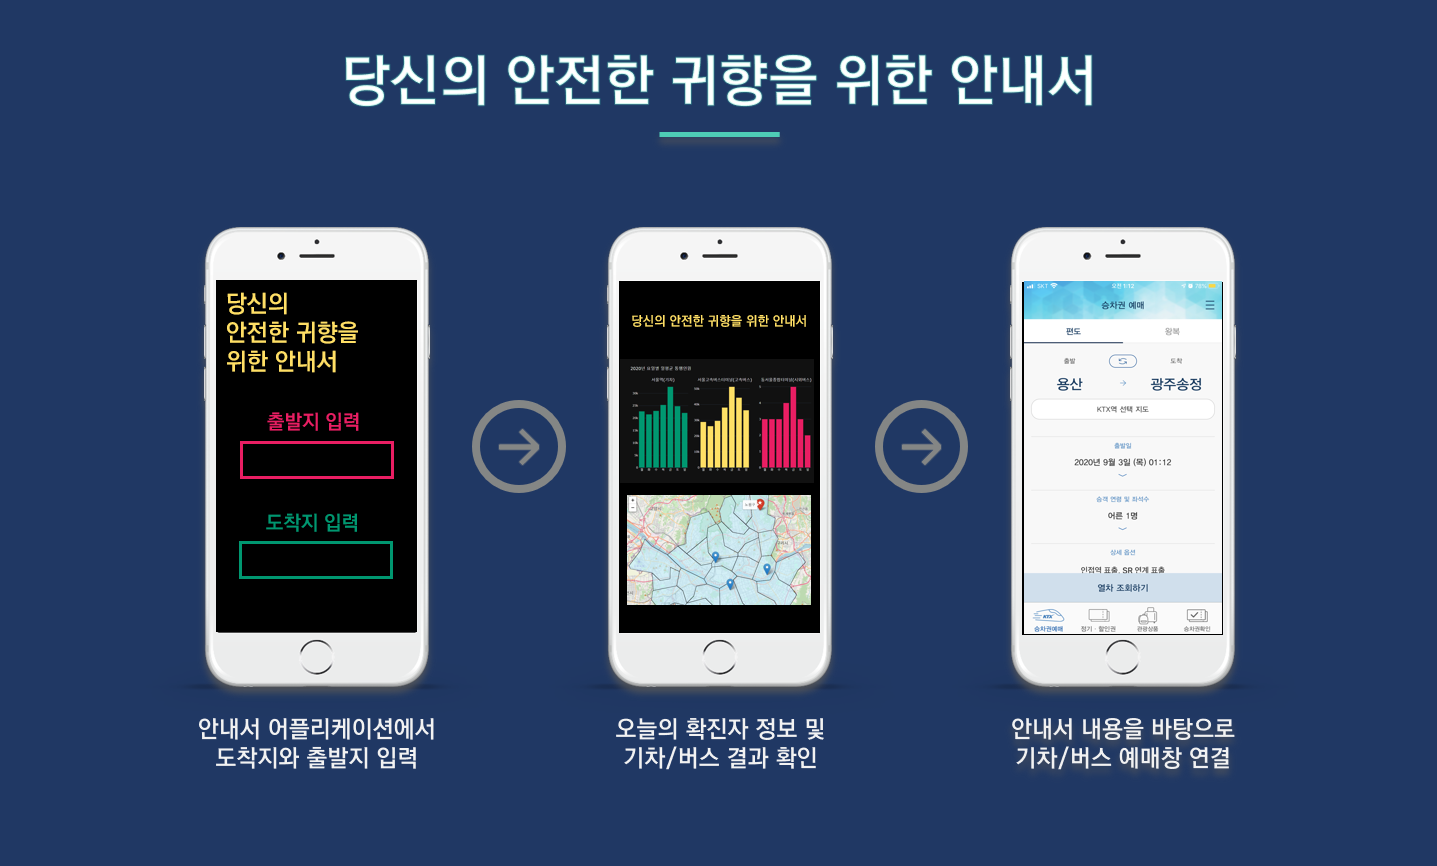

In [126]:
Image("./1.png")

<br>

## 3. **한계점 및 개선방향**
 안내서를 제작하는 과정에서 아쉬웠던 점 몇 가지를 다음과 같이 정리했습니다. 
1. 데이터가 2019/2020년으로 짧았기 때문에 시계열 데이터의 특성을 잡아낼 수 없었습니다.
 코로나19 사태는 넓은 관점에서 보았을 때 장기적 이벤트가 이니기에, 장기적인 데이터에 적용하는 분석을 하기는 어려웠습니다. 시계열 자료의 특성 중 비교적 자주 나타나는 계절성과 같은 주기도 코로나19가 시작된 지 1년이 채 되지 않았기 때문에 적용하기 어려웠습니다. 코로나 사태가 장기화되지 않고 끝나기를 간절히 바라지만, 만약 장기화된다면 데이터를 보다 축적하여 더 좋은 안내를 제공할 수 있을 것입니다. 

2. 즉각적인 정보 반영에는 미흡합니다.
 이는 지금까지의 추이에 따라 안내서를 제공하기 때문입니다. 하지만 기대효과에서 언급했듯 추후 데이터를 실시간으로 반영할 수 있는 플랫폼만 제공된다면 쉽게 구현이 가능합니다. 

3. 어느 분석에서도 비슷하게 느끼지만, 데이터의 품질 자체도 분석하는 시간에 영향을 많이 준다는 것을 느꼈습니다. 발권OD에서 데이터 자체의 결측치가 많아 전처리 과정이 길어졌는데, 이 과정에서 원데이터가 가진 정보가 소실되었을 가능성이 있어 보입니다. 하지만 추후 데이터의 양이나 품질이 개선되면 자연스럽게 해결할 수 있을 것이라 기대합니다. 

## **마치며**

 코로나19 바이러스가 우리의 일상을 흔든 지도 벌써 반년이 지났습니다. 그 동안 우리는 여러 번의 집단감염 사태와 사회적 거리두기를 반복하며 코로나19 상황을 완화하려 노력해 왔습니다. 최근 긴장감이 풀린 탓인지 확진자가 급증하고 있지만 이러한 노력이 있었기에 지금까지 코로나와 잘 싸울 수 있었습니다.

 이제 사람들은 코로나19 이후 우리의 세상이 어떠한 모습으로 다시 돌아가게 될 지에 대해 궁금증을 가지기 시작했습니다. 이러한 관심에 힘입어 많은 사람들이 포스트 코로나의 모습에 대해 다양한 예측을 하고 있습니다. 물론 포스트 코로나의 모습에 대해서는 다양하게 의견이 갈리지만, 공통적으로 언급하는 내용은 '코로나 이전으로 돌아갈 수는 없다.'입니다. 

 이는 지금까지 익숙함과 안정감을 토대로 세계를 이끌어 온 우리가, 앞으로는 다가올 시대를 한 발 더 앞서 예측하는 사람들의 이야기에 관심을 가질 수 밖에 없게 합니다.

 이번 분석을 진행하면서 코로나19에 상황에 대한 전반적인 이해와 더불어 포스트 코로나라는 주제도 함께 다뤄볼 수 있어 저희가 공부하는 데에도 좋은 기회가 되었습니다. 또한 '데이터'는 포스트 코로나 시대를 이끌어나가는 데에 있어 핵심적인 역할을 할 것이라는 것 또한 느낄 수 있었습니다. 저희의 분석이 흥미로우셨기를 바라며, 포스트 코로나 시대의 긍정적인 흐름을 이끌어낼 수 있도록 앞으로 더욱 열심히 공부하겠습니다. 저희 분석의 흐름을 같이 해 주셔서 진심으로 감사하고 다들 건강하시길 바랍니다!

---

'본 저작물의 저작권은 Apache License v2.0을 따릅니다'